# FDP - Understanding Depression through XAI
Tamara Pérez Pérez



## Table of contents<a class="anchor" id="index"></a>
[Data Treatment](#data-treatment)
* [Imports](#imports)
* [Load Datasets](#datasets)
* [Target](#target)
* [Demographic Data](#dem-data)
   * [Gender](#gender)
   * [Age](#age)
   * [Race](#race)
   * [Education Level](#education-level)
   * [Marital Status](#marital-status)
   * [People in the Household](#people-in-household)
   * [Annual Household Income](#income)
   * [Citzenship Status](#citizenship)
* [Laboratory Data](#lab-data)
* [Examination Data](#examination-data)  
* [Questionnaire Data](#questionnaire-data)  
   * [Alcohol Use](#alcohol)
   * [Smoking](#smoking)
   * [Sleeping](#sleeping)
   * [Physical Activity](#physical-activity)
* [Dietary Data](#dietary-data) 
   * [Calorie needs](#calories)
   * [Macronutrient needs](#macros)
   * [Mineral needs](#minerals)
   * [Vitamin needs](#vitamins)
   * [Total Nutrient Score](#score)
* [Final Dataset](#final-dataset) 




## Data Treatment<a class="anchor" id="data-treatment"></a>

### Imports<a class="anchor" id="imports"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load Datasets<a class="anchor" id="datasets"></a>

In [2]:
df_labs = pd.read_csv('csv/labs.csv',index_col=0, encoding='ISO-8859-1')
df_exam= pd.read_csv('csv/examination.csv', index_col=0, encoding='ISO-8859-1')
df_dem = pd.read_csv('csv/demographic.csv', index_col=0, encoding='ISO-8859-1')
df_diet = pd.read_csv('csv/diet.csv', index_col=0, encoding='ISO-8859-1')
df_quest = pd.read_csv('csv/questionnaire.csv', index_col=0, encoding='ISO-8859-1')
df_med = pd.read_csv('csv/medications.csv', index_col=0, encoding='ISO-8859-1')

Explore dataset information

In [3]:
datasets = {'laboratory_dataset': df_labs,
            'examination_dataset': df_exam, 
            'demographic_dataset': df_dem, 
            'diet_dataset': df_diet, 
            'questionnaire_dataset': df_quest, 
            'medication_dataset': df_med}
for name, dataset in datasets.items():
    print(f"\n{name}\n")
    print(f"{dataset.info()}\n{'-'*45}")


laboratory_dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9813 entries, 73557 to 83731
Columns: 423 entries, URXUMA to LBDB12SI
dtypes: float64(423)
memory usage: 31.7 MB
None
---------------------------------------------

examination_dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9813 entries, 73557 to 83731
Columns: 223 entries, PEASCST1 to CSAEFFRT
dtypes: float64(192), int64(2), object(29)
memory usage: 16.8+ MB
None
---------------------------------------------

demographic_dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10175 entries, 73557 to 83731
Data columns (total 46 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SDDSRVYR  10175 non-null  int64  
 1   RIDSTATR  10175 non-null  int64  
 2   RIAGENDR  10175 non-null  int64  
 3   RIDAGEYR  10175 non-null  int64  
 4   RIDAGEMN  673 non-null    float64
 5   RIDRETH1  10175 non-null  int64  
 6   RIDRETH3  10175 non-null  int64  
 7   RIDEXMON  981

Define functions

In [4]:
def print_values_variables(dataset):
    """
    Print value counts for each variable in the dataset.

    Parameters:
    - dataset (pd.DataFrame): The input DataFrame.
    """
    for values in dataset:
        print(f"{values} value counts:\n{dataset[values].value_counts(dropna=False)}\n{'-'*50}")

In [5]:
def detect_outliers_and_replace_with_nan(data, columns=None):
    """
    Detect outliers in numerical columns of a DataFrame and replace them with NaN.

    Parameters:
    - data (pd.DataFrame): The input DataFrame.
    - columns (list or None): List of columns to check for outliers. If None, only numerical columns are considered.

    Returns:
    - pd.DataFrame: DataFrame with outliers replaced by NaN.
    """
        
    if columns is None:
        # Only numerical columns
        numeric_columns = data.select_dtypes(include=np.number).columns
        columns = numeric_columns
    
    for column in columns:
        # Calculate z-scores for the specified column
        z_scores = np.abs((data[column] - data[column].mean()) / data[column].std())
        
        # Identify outliers in the specified column
        outliers_mask = z_scores > 3
        
        if outliers_mask.any():  # Verify if there are outliers
            # Print outliers found
            print(f'Outliers in {column}: {data.loc[outliers_mask, column].tolist()}')
            
            # If found replace with NaN
            data.loc[outliers_mask, column] = np.nan
            print(f'Replacing outliers in {column} with NAN.')
        else:
            print(f'No outliers found in {column}.')

    return data


### Target<a class="anchor" id="target"></a>

Our project aims to identify factors contributing to depression and classify individuals as depressed or not. We utilize the [nine-item Patient Health Questionnaire (PHQ-9) scale] (https://en.wikipedia.org/wiki/PHQ-9), scored from 1 to 27, with questions(DPQ010-DPQ90) sourced from the "questionnaire.csv" dataset.

In [6]:
df_PHQ9 = df_quest[['DPQ010','DPQ020','DPQ030','DPQ040','DPQ050','DPQ060','DPQ070','DPQ080','DPQ090']].copy()
df_PHQ9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10175 entries, 73557 to 83731
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DPQ010  5398 non-null   float64
 1   DPQ020  5396 non-null   float64
 2   DPQ030  5395 non-null   float64
 3   DPQ040  5395 non-null   float64
 4   DPQ050  5395 non-null   float64
 5   DPQ060  5394 non-null   float64
 6   DPQ070  5394 non-null   float64
 7   DPQ080  5394 non-null   float64
 8   DPQ090  5393 non-null   float64
dtypes: float64(9)
memory usage: 794.9 KB


In [7]:
df_PHQ9.head()

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090
SEQN,,,,,,,,,
73557,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73558,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73561,2.0,1.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0


Checking the values for each PHQ-9 question

In [8]:
print_values_variables(df_PHQ9)

DPQ010 value counts:
NaN    4777
0.0    3976
1.0     881
2.0     293
3.0     242
9.0       5
7.0       1
Name: DPQ010, dtype: int64
--------------------------------------------------
DPQ020 value counts:
NaN    4779
0.0    4071
1.0     903
2.0     214
3.0     202
7.0       3
9.0       3
Name: DPQ020, dtype: int64
--------------------------------------------------
DPQ030 value counts:
NaN    4780
0.0    3416
1.0    1127
3.0     501
2.0     350
7.0       1
Name: DPQ030, dtype: int64
--------------------------------------------------
DPQ040 value counts:
NaN    4780
0.0    2650
1.0    1829
3.0     492
2.0     423
7.0       1
Name: DPQ040, dtype: int64
--------------------------------------------------
DPQ050 value counts:
NaN    4780
0.0    4036
1.0     832
2.0     278
3.0     247
9.0       2
Name: DPQ050, dtype: int64
--------------------------------------------------
DPQ060 value counts:
NaN    4781
0.0    4449
1.0     620
3.0     167
2.0     154
9.0       4
Name: DPQ060, dtype: int64
-

Remove entries with null values, 7 (Refused), and 9 (Don't Know) for meaningful evaluation

In [9]:
delete_rows = df_PHQ9[df_PHQ9.isin([7, 9]).any(axis=1) | df_PHQ9.isnull().any(axis=1)]
df_PHQ9.drop(delete_rows.index, inplace=True)
df_PHQ9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5372 entries, 73557 to 83727
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DPQ010  5372 non-null   float64
 1   DPQ020  5372 non-null   float64
 2   DPQ030  5372 non-null   float64
 3   DPQ040  5372 non-null   float64
 4   DPQ050  5372 non-null   float64
 5   DPQ060  5372 non-null   float64
 6   DPQ070  5372 non-null   float64
 7   DPQ080  5372 non-null   float64
 8   DPQ090  5372 non-null   float64
dtypes: float64(9)
memory usage: 419.7 KB


In [10]:
print_values_variables(df_PHQ9)

DPQ010 value counts:
0.0    3967
1.0     878
2.0     291
3.0     236
Name: DPQ010, dtype: int64
--------------------------------------------------
DPQ020 value counts:
0.0    4064
1.0     900
2.0     212
3.0     196
Name: DPQ020, dtype: int64
--------------------------------------------------
DPQ030 value counts:
0.0    3402
1.0    1125
3.0     496
2.0     349
Name: DPQ030, dtype: int64
--------------------------------------------------
DPQ040 value counts:
0.0    2639
1.0    1827
3.0     485
2.0     421
Name: DPQ040, dtype: int64
--------------------------------------------------
DPQ050 value counts:
0.0    4020
1.0     831
2.0     275
3.0     246
Name: DPQ050, dtype: int64
--------------------------------------------------
DPQ060 value counts:
0.0    4439
1.0     616
3.0     163
2.0     154
Name: DPQ060, dtype: int64
--------------------------------------------------
DPQ070 value counts:
0.0    4410
1.0     584
2.0     191
3.0     187
Name: DPQ070, dtype: int64
----------------------

Calculate the PHQ-9 score for each individual

In [11]:
df_PHQ9['total_score'] = df_PHQ9.sum(axis=1)
df_PHQ9.head()

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,total_score
SEQN,,,,,,,,,,
73557,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
73558,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
73559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73561,2.0,1.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,9.0
73562,3.0,3.0,3.0,3.0,3.0,1.0,2.0,1.0,0.0,19.0


Set a cutoff point of 10 for classification:
**Depressed: 1 (Total Score >= 10)**    
**Not Depressed: 0 (Total Score < 10)**

In [12]:
df_PHQ9['depression_status'] = df_PHQ9['total_score'].apply(lambda x: 'depressed' if x >= 10 else 'not_depressed')
df_PHQ9['depression_status'].value_counts()

not_depressed    4861
depressed         511
Name: depression_status, dtype: int64

Store the selected rows for use in following datasets

In [13]:
indexes_to_keep = df_PHQ9.index
indexes_to_keep

Int64Index([73557, 73558, 73559, 73561, 73562, 73564, 73566, 73567, 73568,
            73571,
            ...
            83711, 83712, 83715, 83717, 83718, 83720, 83721, 83723, 83724,
            83727],
           dtype='int64', name='SEQN', length=5372)

Delete indexes not found in the PHQ9 dataset

In [14]:
df_labs = df_labs[df_labs.index.isin(indexes_to_keep)]
df_exam= df_exam[df_exam.index.isin(indexes_to_keep)]
df_dem = df_dem[df_dem.index.isin(indexes_to_keep)]
df_diet = df_diet[df_diet.index.isin(indexes_to_keep)]
df_quest = df_quest[df_quest.index.isin(indexes_to_keep)]
df_med = df_med[df_med.index.isin(indexes_to_keep)]

### Demographic Data<a class="anchor" id="dem-data"></a>

Keep only the columns that are needed

In [15]:
df_dem = df_dem[['RIAGENDR','RIDAGEYR','RIDRETH3','DMDEDUC2','DMDMARTL','DMDHHSIZ','INDHHIN2','DMDCITZN']].copy()
df_dem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5372 entries, 73557 to 83727
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RIAGENDR  5372 non-null   int64  
 1   RIDAGEYR  5372 non-null   int64  
 2   RIDRETH3  5372 non-null   int64  
 3   DMDEDUC2  5054 non-null   float64
 4   DMDMARTL  5054 non-null   float64
 5   DMDHHSIZ  5372 non-null   int64  
 6   INDHHIN2  5313 non-null   float64
 7   DMDCITZN  5369 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 377.7 KB


Change the names of values for clarity

In [16]:
new_column_names = ['gender', 'age', 'race', 'education_level', 'marital_status', 'people_in_the_household', 'annual_household_income', 'citizenship_status']
df_dem.columns = new_column_names

Check the values of each column

In [17]:
print_values_variables(df_dem)

gender value counts:
2    2787
1    2585
Name: gender, dtype: int64
--------------------------------------------------
age value counts:
80    282
18    177
19    141
63    107
60    104
     ... 
76     47
75     45
78     32
77     30
79     24
Name: age, Length: 63, dtype: int64
--------------------------------------------------
race value counts:
3    2315
4    1087
1     753
6     562
2     481
7     174
Name: race, dtype: int64
--------------------------------------------------
education_level value counts:
4.0    1591
5.0    1292
3.0    1130
2.0     683
1.0     357
NaN     318
9.0       1
Name: education_level, dtype: int64
--------------------------------------------------
marital_status value counts:
1.0     2637
5.0      955
3.0      582
2.0      369
6.0      358
NaN      318
4.0      151
77.0       2
Name: marital_status, dtype: int64
--------------------------------------------------
people_in_the_household value counts:
2    1492
3     986
4     888
1     711
5     641
7  

#### Gender<a class="anchor" id="gender"></a>

1: Male  
2: Female

In [18]:
df_dem['gender'].value_counts()

2    2787
1    2585
Name: gender, dtype: int64

In [19]:
df_dem['gender'].replace({1:'male',
                          2:'female'},inplace=True)

In [20]:
df_dem['gender'].value_counts(dropna=False)

female    2787
male      2585
Name: gender, dtype: int64

#### Age<a class="anchor" id="age"></a>

Explore minimum, maximum, and null values

In [21]:
df_dem['age'].describe()

count    5372.000000
mean       47.379002
std        18.462734
min        18.000000
25%        32.000000
50%        47.000000
75%        63.000000
max        80.000000
Name: age, dtype: float64

#### Race<a class="anchor" id="race"></a>

 1: Mexican  
 2: Hispanic  
 3: White  
 4: Black  
 6: Asian  
 7: Other Race

In [22]:
df_dem['race'].value_counts(dropna=False)

3    2315
4    1087
1     753
6     562
2     481
7     174
Name: race, dtype: int64

In [23]:
df_dem['race'].replace({1:'mexican',
                        2:'hispanic',
                        3:'white',
                        4:'black',
                        6:'asian',
                        7:'other_race'},inplace=True)

#### Education Level<a class="anchor" id="education-level"></a>

 1: Less than 9th grade  
 2: 9-11th grade (Includes 12th grade with no diploma)  
 3: High school graduate/GED or equivalent  
 4: Some college or AA degree  
 5: College graduate or above  
 7: Refused  
 9: Don't Know

In [24]:
df_dem['education_level'].value_counts(dropna=False)

4.0    1591
5.0    1292
3.0    1130
2.0     683
1.0     357
NaN     318
9.0       1
Name: education_level, dtype: int64

Replace names and fill in missing values with 'Unknown'

In [25]:
df_dem['education_level'].replace({1:'less_than_9th_grade',
                                   2:'9-11th_grade',
                                   3:'high_school',
                                   4:'some_college',
                                   5:'college_graduate',
                                   9:'unknown'},inplace=True)
df_dem['education_level'].fillna('unknown', inplace=True)
df_dem['education_level'].value_counts(dropna=False)

some_college           1591
college_graduate       1292
high_school            1130
9-11th_grade            683
less_than_9th_grade     357
unknown                 319
Name: education_level, dtype: int64

#### Marital Status<a class="anchor" id="marital-status"></a>

 1: Married  
 2: Widowed  
 3: Divorced  
 4: Separated  
 5: Never married  
 6: Living with partner  
 77: Refused  
 99: Don't Know

In [26]:
df_dem['marital_status'].value_counts(dropna=False)

1.0     2637
5.0      955
3.0      582
2.0      369
6.0      358
NaN      318
4.0      151
77.0       2
Name: marital_status, dtype: int64

In [27]:
df_dem['marital_status'].replace({1:'married',
                                  2:'widowed',
                                  3:'divorced',
                                  4:'separated',
                                  5:'never_married',
                                  6:'living_with_partner',
                                  77:'unknown'},inplace=True)
df_dem['marital_status'].fillna('unknown', inplace=True)
df_dem['marital_status'].value_counts(dropna=False)

married                2637
never_married           955
divorced                582
widowed                 369
living_with_partner     358
unknown                 320
separated               151
Name: marital_status, dtype: int64

#### People in the Household<a class="anchor" id="people-in-household"></a>

 1 to 7 people  
 7 or more people

In [28]:
df_dem['people_in_the_household'].value_counts(dropna=False)

2    1492
3     986
4     888
1     711
5     641
7     332
6     322
Name: people_in_the_household, dtype: int64

#### Annual Household Income<a class="anchor" id="income"></a>

 Values in dollars  
 1:  0-4999  
 2:  5000-9999  
 3:  10000-14999  
 4:  15000-19999  
 5:  20000-24999  
 6:  25000-34999  
 7:  35000-44999  
 8:  45000-54999  
 9:  55000-64999  
 10: 65000-74999  
 12: 20000 and over  
 13: Under 20000  
 14: 75000 - 99999  
 15: 100000 and over  
 77: Refused  
 99: Don't Know

In [29]:
df_dem['annual_household_income'].value_counts(dropna=False)

15.0    987
6.0     559
7.0     498
14.0    460
5.0     441
8.0     428
3.0     332
4.0     330
9.0     309
10.0    226
2.0     214
12.0    193
77.0    131
1.0     111
NaN      59
13.0     58
99.0     36
Name: annual_household_income, dtype: int64

Fix and order inconsistent income values from 0 to 15 (0: lowest, 15: highest income)   
Treat null values, 77, and 99 as 0 income, then convert values to int

In [30]:
df_dem['annual_household_income'].dtypes

dtype('float64')

In [31]:
df_dem['annual_household_income'].replace({12.0: 5,
                                           13.0: 4,
                                           14.0: 11,
                                           15.0: 12,
                                           77: 0,
                                           99: 0},inplace=True)
df_dem['annual_household_income'].fillna(0, inplace=True)
df_dem['annual_household_income'] = df_dem['annual_household_income'].astype('int64')

In [32]:
df_dem['annual_household_income'].value_counts(dropna=False)

12    987
5     634
6     559
7     498
11    460
8     428
4     388
3     332
9     309
10    226
0     226
2     214
1     111
Name: annual_household_income, dtype: int64

#### Citizenship Status<a class="anchor" id="citizenship"></a>

 1: Citizen by birth or naturalization  
 2: Not a citizen of the US  
 7: Refused  
 9: Don't Know

In [33]:
df_dem['citizenship_status'].value_counts(dropna=False)

1.0    4707
2.0     658
7.0       4
NaN       3
Name: citizenship_status, dtype: int64

In [34]:
df_dem['citizenship_status'].replace({1.0: 'citizen',
                                      2.0: 'not_citizen',
                                      7.0: 'unknown',
                                      9.0: 'unknown'},inplace=True)
df_dem['citizenship_status'].fillna('unknown', inplace=True)
df_dem['citizenship_status'].value_counts(dropna=False)

citizen        4707
not_citizen     658
unknown           7
Name: citizenship_status, dtype: int64

In [35]:
df_dem.head()

,gender,age,race,education_level,marital_status,people_in_the_household,annual_household_income,citizenship_status
SEQN,,,,,,,,
73557,male,69,black,high_school,separated,3,4,citizen
73558,male,54,white,high_school,married,4,7,citizen
73559,male,72,white,some_college,married,2,10,citizen
73561,female,73,white,college_graduate,married,2,12,citizen
73562,male,56,mexican,some_college,divorced,1,9,citizen


In [36]:
print_values_variables(df_dem)

gender value counts:
female    2787
male      2585
Name: gender, dtype: int64
--------------------------------------------------
age value counts:
80    282
18    177
19    141
63    107
60    104
     ... 
76     47
75     45
78     32
77     30
79     24
Name: age, Length: 63, dtype: int64
--------------------------------------------------
race value counts:
white         2315
black         1087
mexican        753
asian          562
hispanic       481
other_race     174
Name: race, dtype: int64
--------------------------------------------------
education_level value counts:
some_college           1591
college_graduate       1292
high_school            1130
9-11th_grade            683
less_than_9th_grade     357
unknown                 319
Name: education_level, dtype: int64
--------------------------------------------------
marital_status value counts:
married                2637
never_married           955
divorced                582
widowed                 369
living_with_partner  

In [37]:
df_dem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5372 entries, 73557 to 83727
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   gender                   5372 non-null   object
 1   age                      5372 non-null   int64 
 2   race                     5372 non-null   object
 3   education_level          5372 non-null   object
 4   marital_status           5372 non-null   object
 5   people_in_the_household  5372 non-null   int64 
 6   annual_household_income  5372 non-null   int64 
 7   citizenship_status       5372 non-null   object
dtypes: int64(3), object(5)
memory usage: 377.7+ KB


### Laboratory Data<a class="anchor" id="lab-data"></a>

Keep only the necessary columns

In [38]:
df_labs.columns.tolist()

['URXUMA',
 'URXUMS',
 'URXUCR.x',
 'URXCRS',
 'URDACT',
 'WTSAF2YR.x',
 'LBXAPB',
 'LBDAPBSI',
 'LBXSAL',
 'LBDSALSI',
 'LBXSAPSI',
 'LBXSASSI',
 'LBXSATSI',
 'LBXSBU',
 'LBDSBUSI',
 'LBXSC3SI',
 'LBXSCA',
 'LBDSCASI',
 'LBXSCH',
 'LBDSCHSI',
 'LBXSCK',
 'LBXSCLSI',
 'LBXSCR',
 'LBDSCRSI',
 'LBXSGB',
 'LBDSGBSI',
 'LBXSGL',
 'LBDSGLSI',
 'LBXSGTSI',
 'LBXSIR',
 'LBDSIRSI',
 'LBXSKSI',
 'LBXSLDSI',
 'LBXSNASI',
 'LBXSOSSI',
 'LBXSPH',
 'LBDSPHSI',
 'LBXSTB',
 'LBDSTBSI',
 'LBXSTP',
 'LBDSTPSI',
 'LBXSTR',
 'LBDSTRSI',
 'LBXSUA',
 'LBDSUASI',
 'LBXWBCSI',
 'LBXLYPCT',
 'LBXMOPCT',
 'LBXNEPCT',
 'LBXEOPCT',
 'LBXBAPCT',
 'LBDLYMNO',
 'LBDMONO',
 'LBDNENO',
 'LBDEONO',
 'LBDBANO',
 'LBXRBCSI',
 'LBXHGB',
 'LBXHCT',
 'LBXMCVSI',
 'LBXMCHSI',
 'LBXMC',
 'LBXRDW',
 'LBXPLTSI',
 'LBXMPSI',
 'URXUCL',
 'WTSA2YR.x',
 'LBXSCU',
 'LBDSCUSI',
 'LBXSSE',
 'LBDSSESI',
 'LBXSZN',
 'LBDSZNSI',
 'URXUCR.y',
 'WTSB2YR.x',
 'URXBP3',
 'URDBP3LC',
 'URXBPH',
 'URDBPHLC',
 'URXBPF',
 'URDBPFLC',
 'URXBPS',

In [39]:
df_labs = df_labs.fillna(0)

In [40]:
df_labs = df_labs[['LBXTC','LBDHDD','LBDLDL','LBXTR',
                   'LBXLYPCT','LBXMOPCT','LBXNEPCT','LBXEOPCT','LBXBAPCT','LBXHCT',
                   'LBDB12','LBXSAL','LBXSASSI','LBXSATSI','LBXSBU','LBXSC3SI','LBXSCA','LBXSCK','LBXSCLSI','LBXSCR','LBXSGB','LBXSGL','LBXSGTSI','LBXSIR','LBXSKSI','LBXSLDSI','LBXSNASI','LBXSOSSI','LBXSPH','LBXSTB','LBXSTP','LBXSUA']].copy()

Replace column names

In [41]:
new_column_names_labs = ['total_cholesterol','HDL-cholesterol','LDL-cholesterol','triglyceride',
                        'lymphocyte_percent','monocyte_percent','neutrophils_percent','eosinophils_percent','basophils_percent','hematocrit_percent',
                         'vitamin_B12','albumin','AST','ALT','blood_urea_nitrogen','bicarbonate','total_calcium','CPK','chloride','creatinine','globulin','glucose','gamma_glutamyl_transferase','iron','potassium','lactate_dehydrogenase','sodium','osmolality','phosphorus','total_bilirubin','total_protein','uric_acid']
df_labs.columns = new_column_names_labs
df_labs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5372 entries, 73557 to 83727
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   total_cholesterol           5372 non-null   float64
 1   HDL-cholesterol             5372 non-null   float64
 2   LDL-cholesterol             5372 non-null   float64
 3   triglyceride                5372 non-null   float64
 4   lymphocyte_percent          5372 non-null   float64
 5   monocyte_percent            5372 non-null   float64
 6   neutrophils_percent         5372 non-null   float64
 7   eosinophils_percent         5372 non-null   float64
 8   basophils_percent           5372 non-null   float64
 9   hematocrit_percent          5372 non-null   float64
 10  vitamin_B12                 5372 non-null   float64
 11  albumin                     5372 non-null   float64
 12  AST                         5372 non-null   float64
 13  ALT                         

Explore for outliers in the dataset

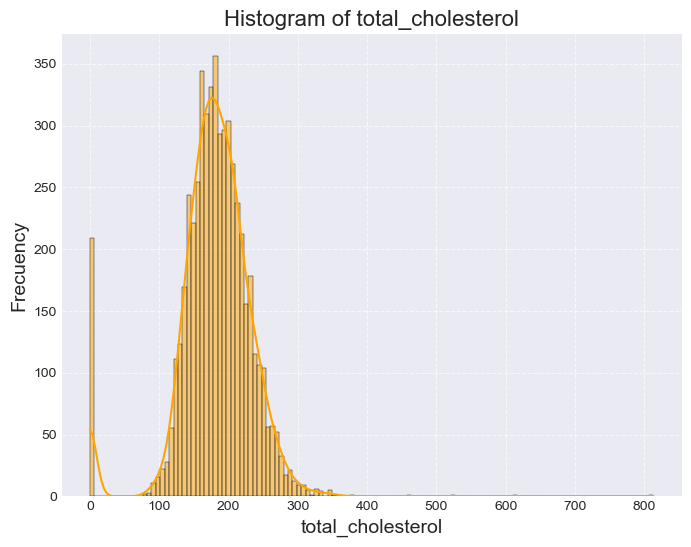

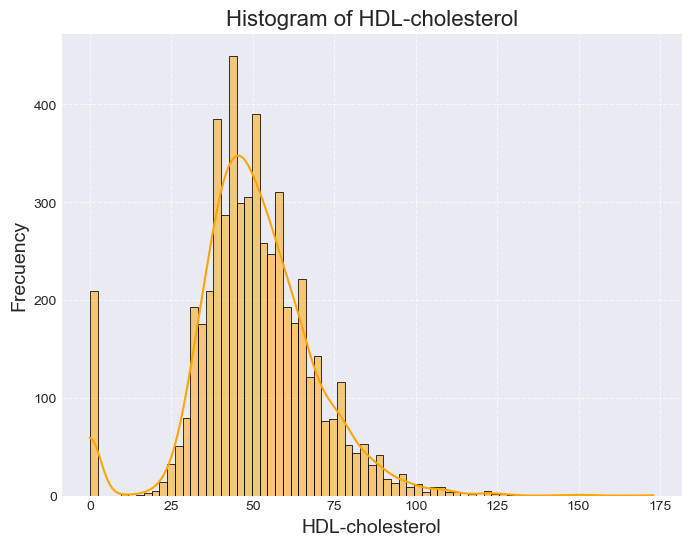

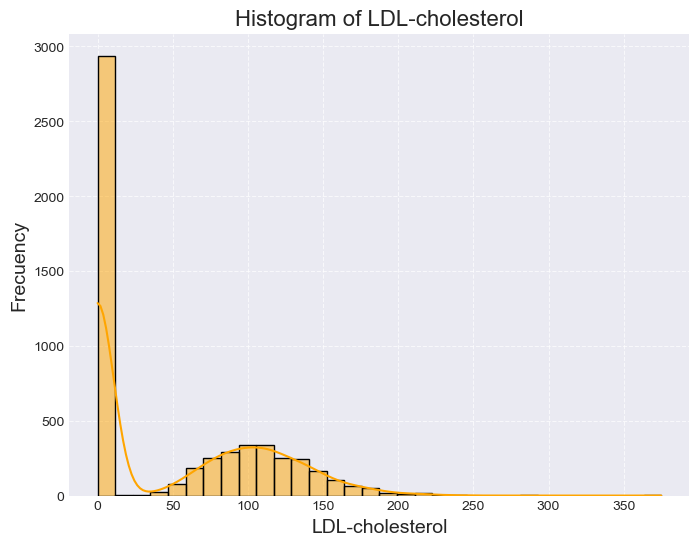

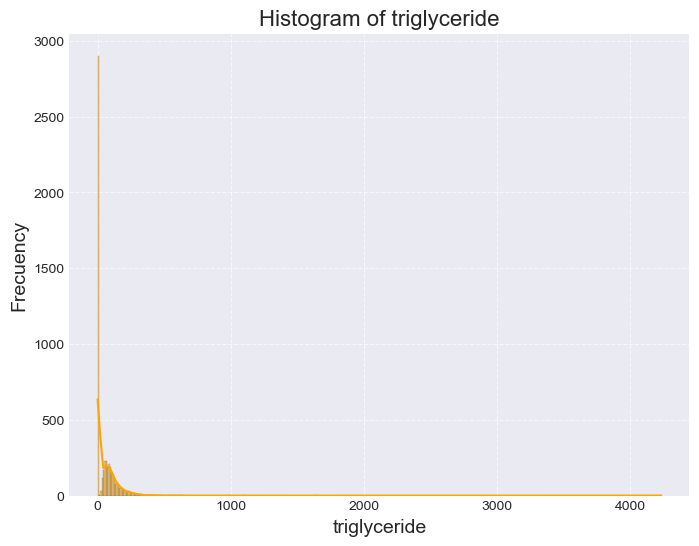

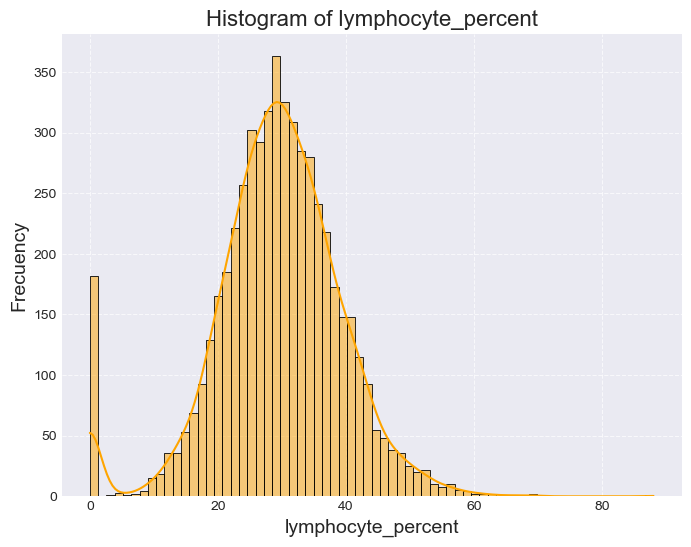

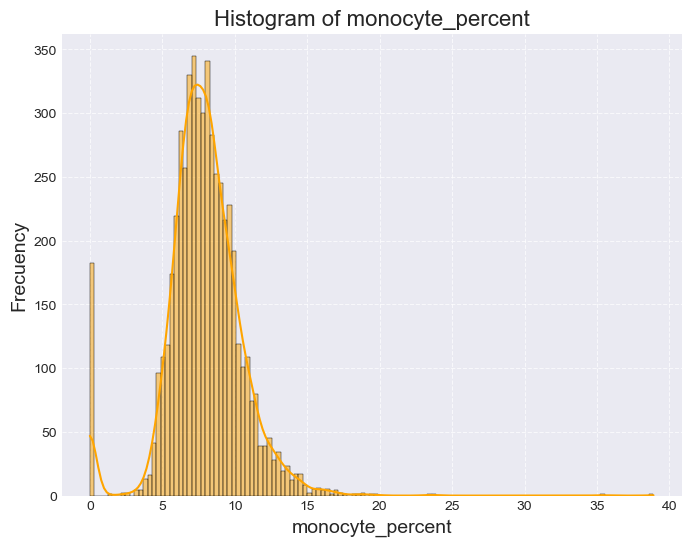

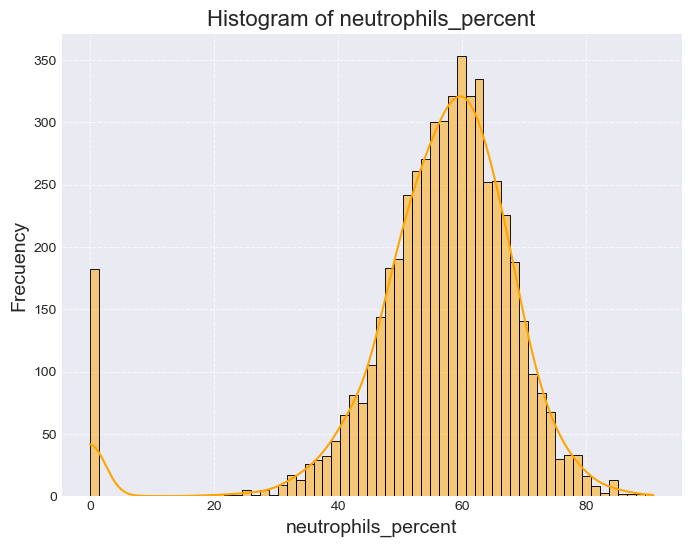

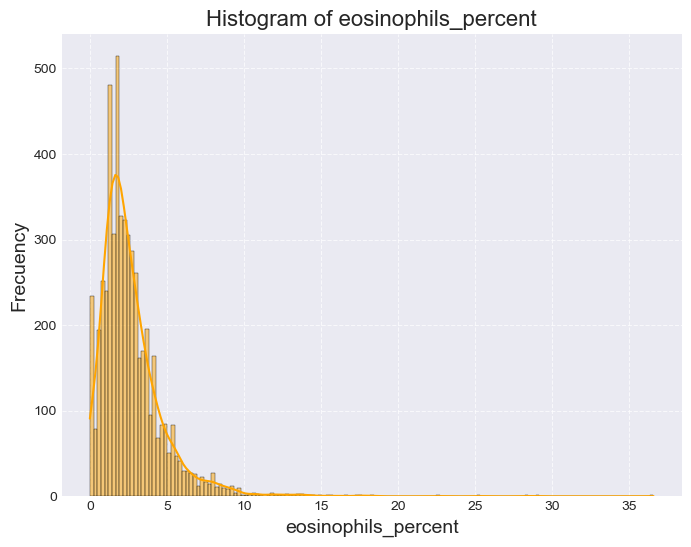

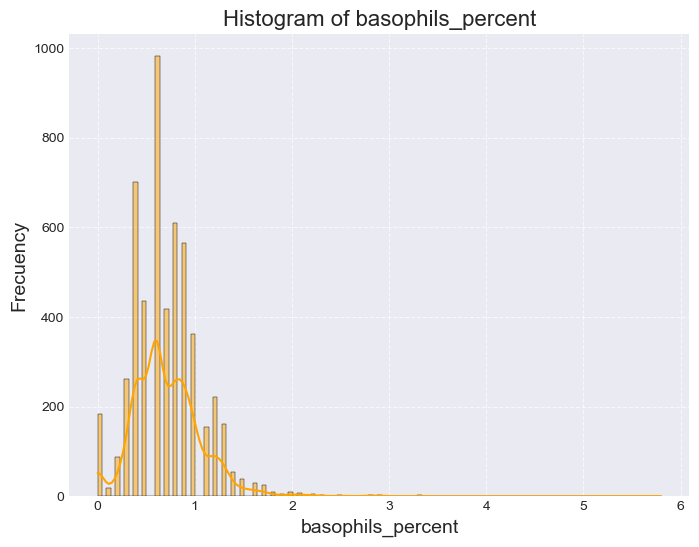

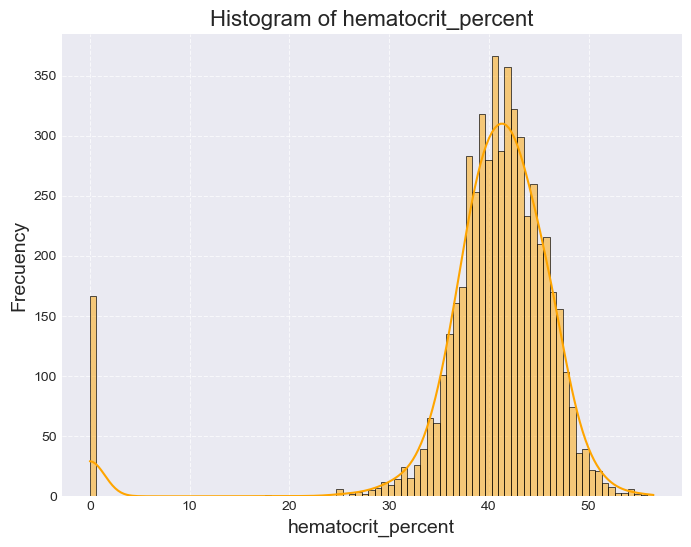

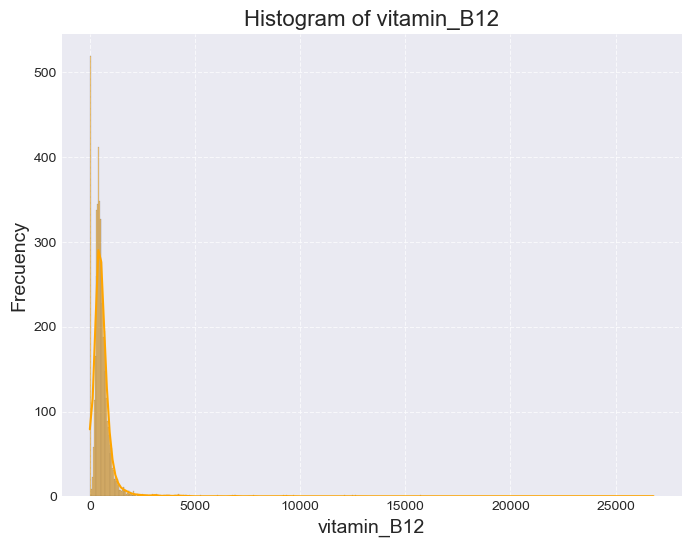

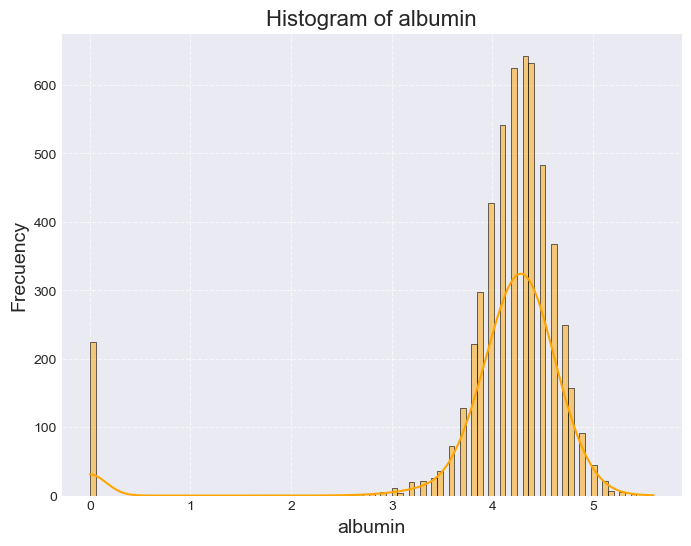

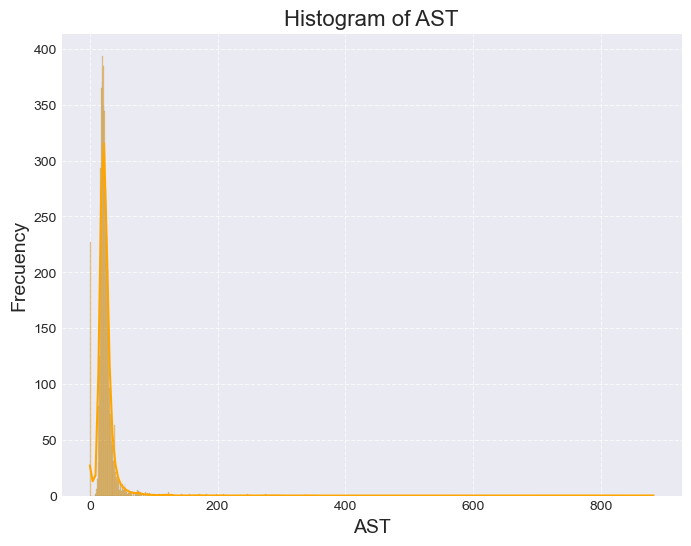

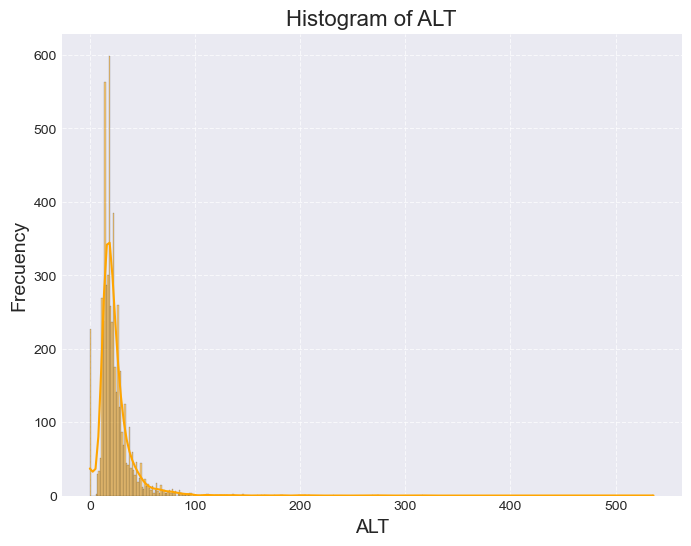

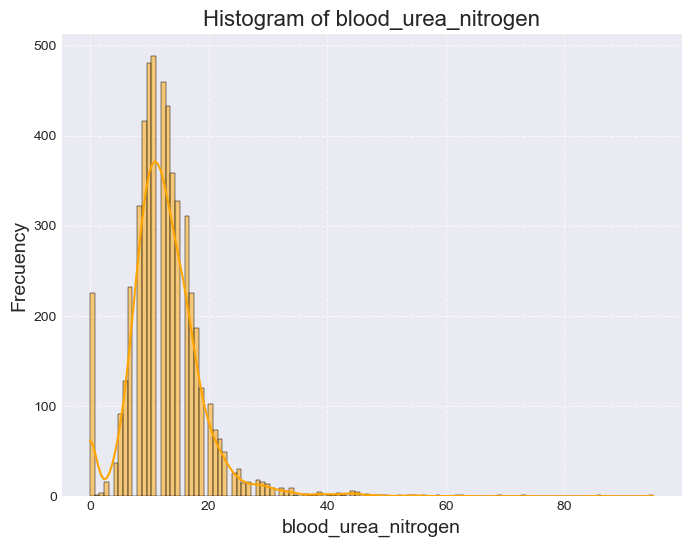

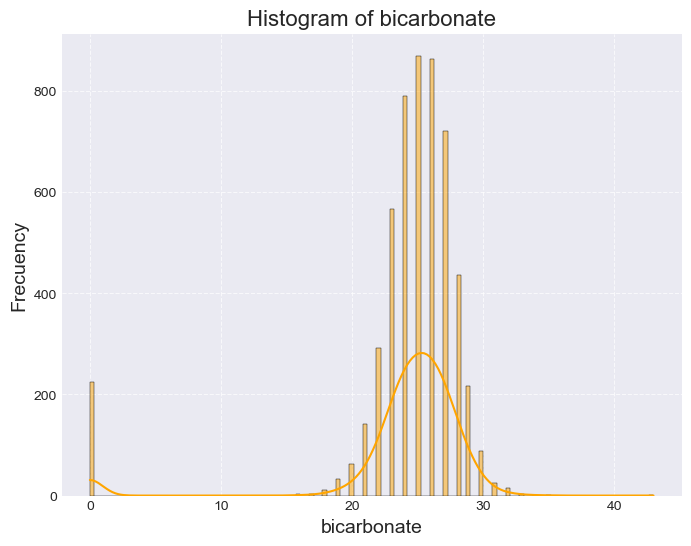

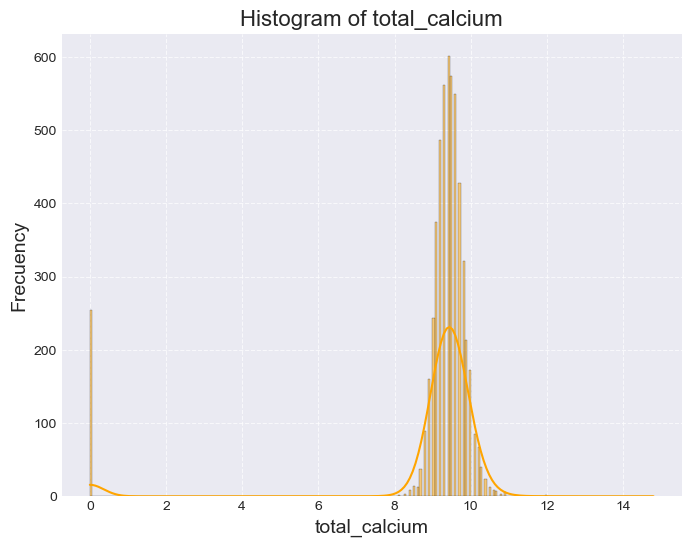

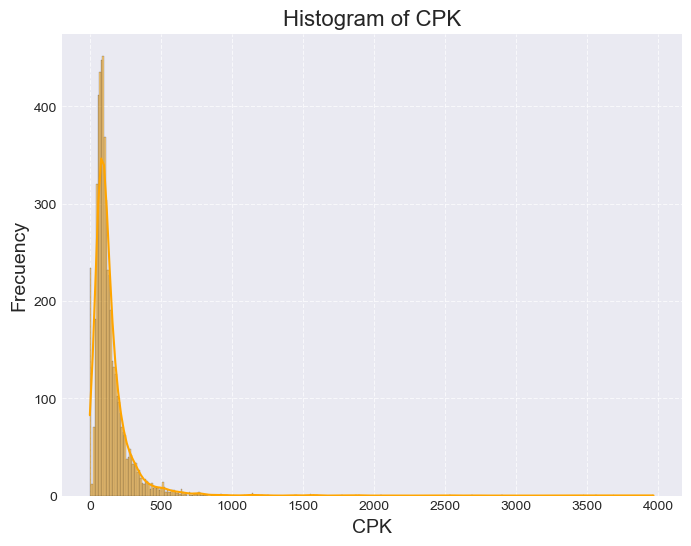

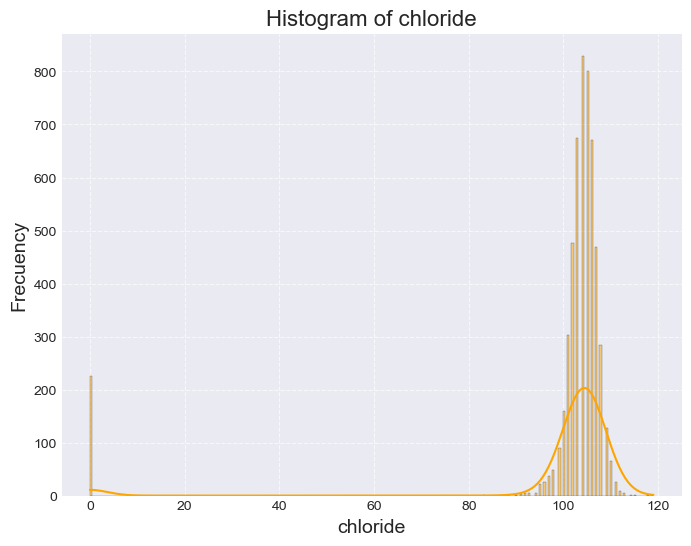

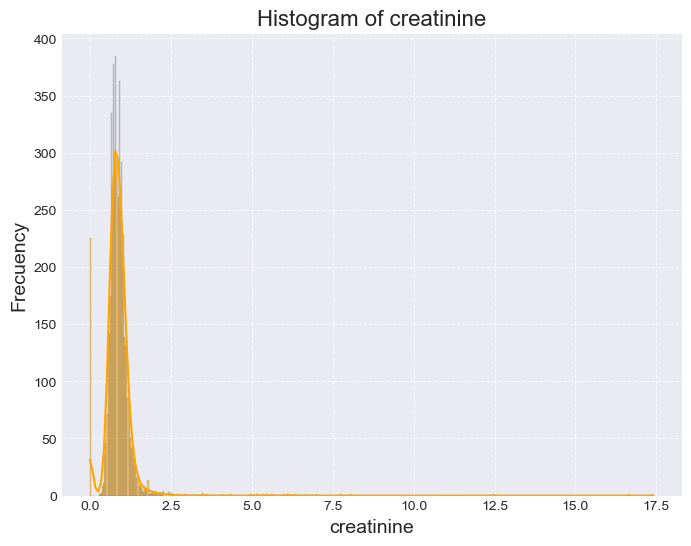

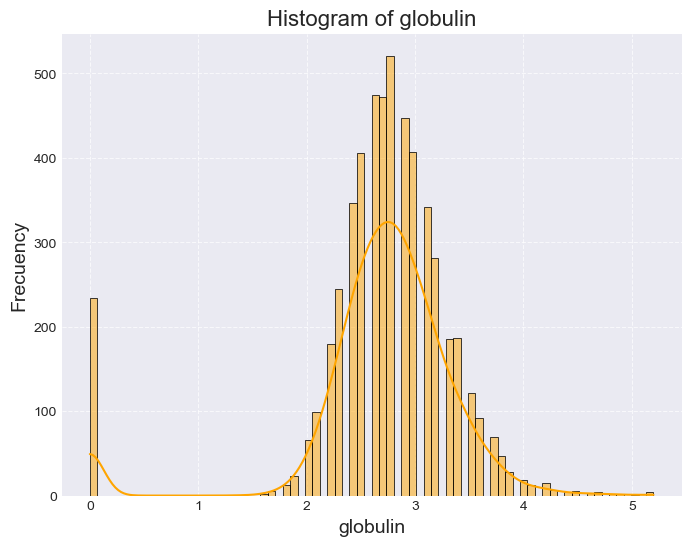

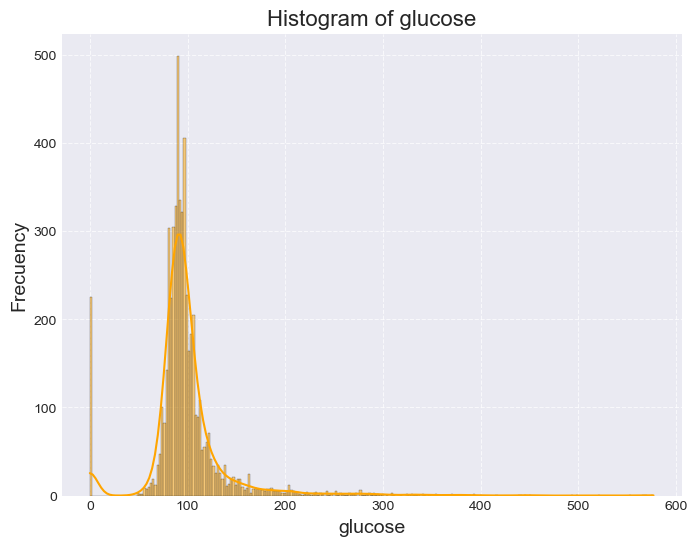

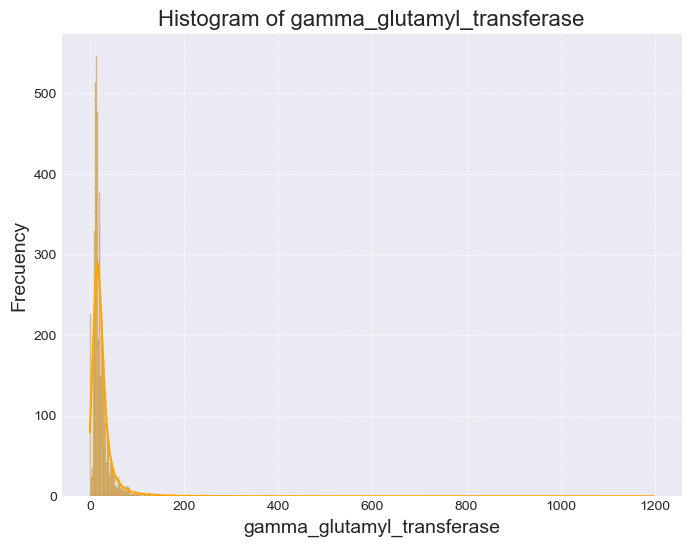

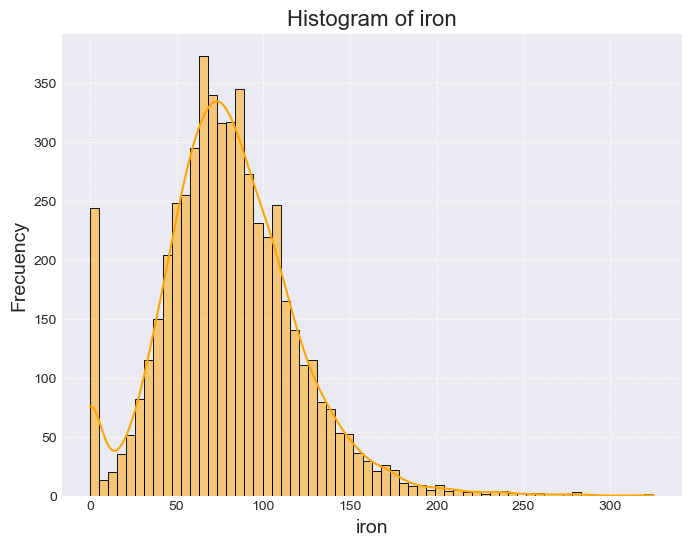

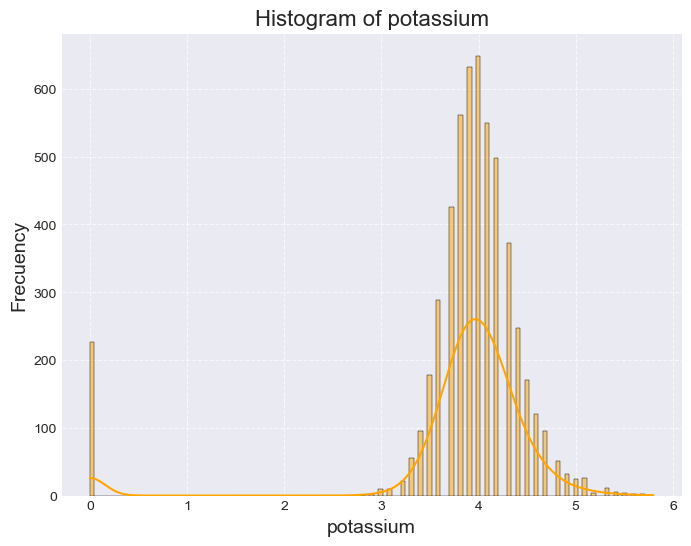

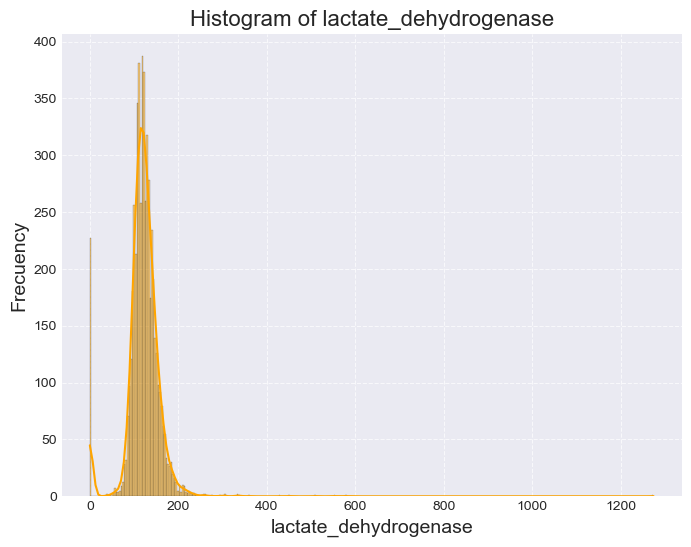

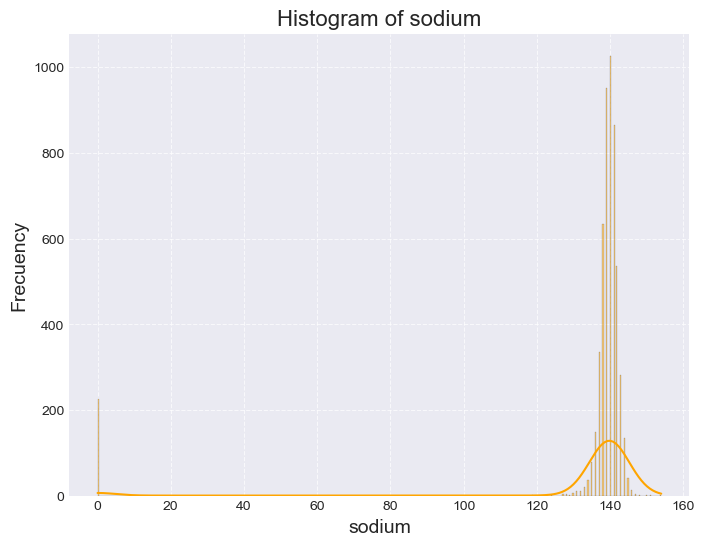

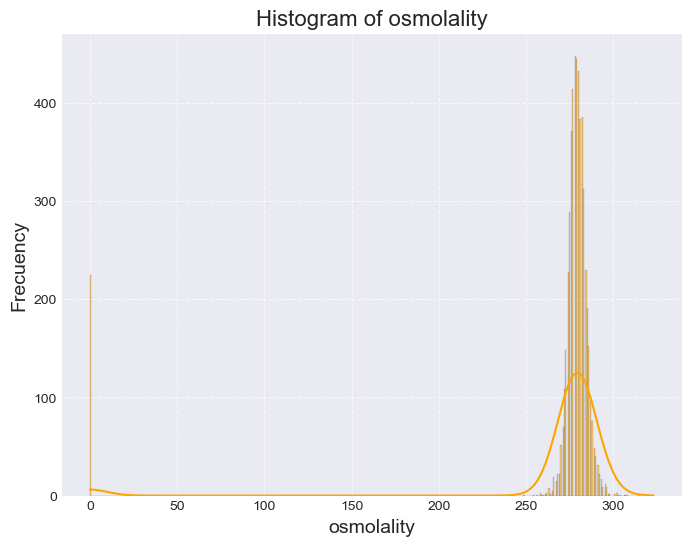

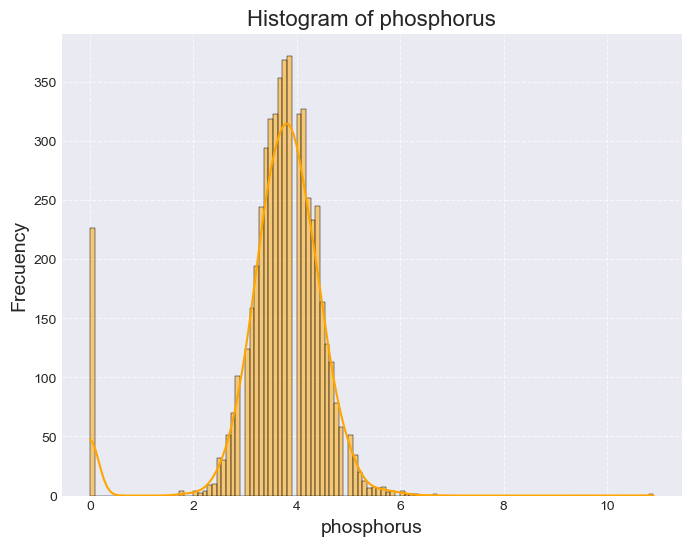

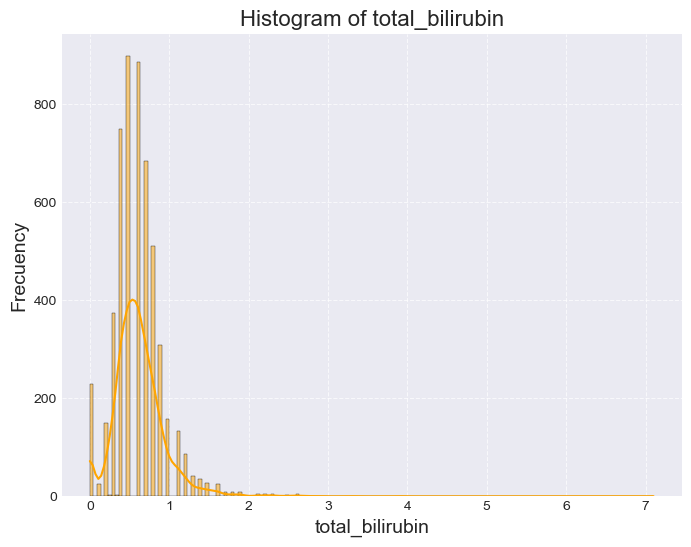

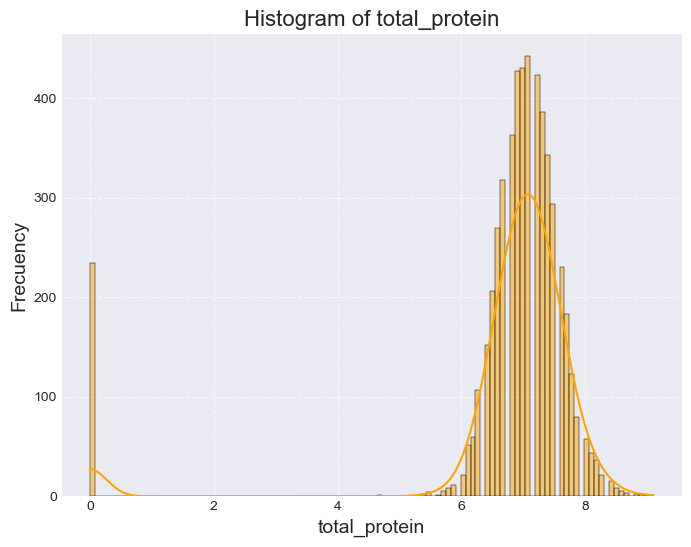

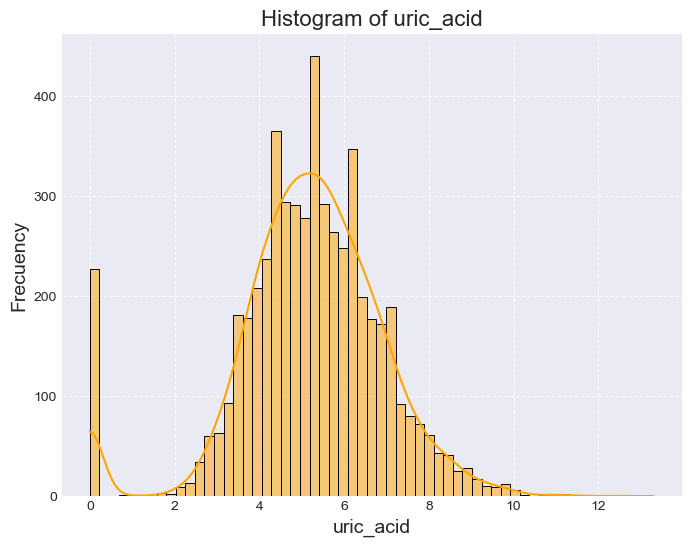

In [42]:
plt.style.use('seaborn-darkgrid')

for col in df_labs:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_labs[col], kde=True, color='orange')
    plt.title(f'Histogram of {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Frecuency', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

In [43]:
df_labs.describe()

,total_cholesterol,HDL-cholesterol,LDL-cholesterol,triglyceride,lymphocyte_percent,monocyte_percent,neutrophils_percent,eosinophils_percent,basophils_percent,hematocrit_percent,...,gamma_glutamyl_transferase,iron,potassium,lactate_dehydrogenase,sodium,osmolality,phosphorus,total_bilirubin,total_protein,uric_acid
count,5372.000000,5372.000000,5372.000000,5372.000000,5372.000000,5372.000000,5372.000000,5372.000000,5372.000000,5372.000000,...,5372.000000,5372.000000,5372.000000,5372.000000,5372.000000,5372.000000,5372.000000,5372.000000,5372.000000,5372.000000
mean,180.449181,50.675354,49.831906,54.744974,29.329244,7.908228,56.034736,2.676973,0.716139,40.128518,...,26.420886,80.070365,3.852048,120.721333,133.900968,267.753537,3.668682,0.613743,6.779799,5.195681
std,54.756272,18.648269,59.558575,103.408088,10.020670,2.646066,13.976150,2.165452,0.367911,8.262360,...,40.510523,39.043911,0.879787,41.083609,28.087435,56.216086,0.963302,0.331773,1.519501,1.759349
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,155.000000,40.000000,0.000000,0.000000,24.000000,6.600000,51.300000,1.300000,0.500000,38.400000,...,13.000000,56.000000,3.800000,106.000000,138.000000,276.000000,3.400000,0.400000,6.700000,4.300000
50%,182.000000,49.000000,0.000000,0.000000,29.500000,7.800000,58.100000,2.200000,0.700000,41.300000,...,18.000000,78.000000,4.000000,121.000000,140.000000,279.000000,3.800000,0.600000,7.100000,5.300000
75%,211.000000,61.000000,103.000000,88.000000,35.400000,9.300000,64.100000,3.400000,0.900000,44.125000,...,28.000000,102.000000,4.200000,138.000000,141.000000,282.000000,4.200000,0.800000,7.400000,6.300000
max,813.000000,173.000000,375.000000,4233.000000,88.000000,38.900000,90.800000,36.600000,5.800000,56.500000,...,1197.000000,325.000000,5.800000,1274.000000,154.000000,323.000000,10.900000,7.100000,9.100000,13.300000


In [44]:
detect_outliers_and_replace_with_nan(df_labs, columns=None)

Outliers in total_cholesterol: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 348.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 362.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 354.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 346.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 380.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 612.0, 0.0, 0.0, 0.0, 0.0, 463.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 813.0, 0.0, 345.0, 0.0, 0.0, 0.0, 347.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

,total_cholesterol,HDL-cholesterol,LDL-cholesterol,triglyceride,lymphocyte_percent,monocyte_percent,neutrophils_percent,eosinophils_percent,basophils_percent,hematocrit_percent,...,gamma_glutamyl_transferase,iron,potassium,lactate_dehydrogenase,sodium,osmolality,phosphorus,total_bilirubin,total_protein,uric_acid
SEQN,,,,,,,,,,,,,,,,,,,,,
73557,167.0,65.0,0.0,0.0,42.2,11.0,42.3,3.4,1.2,45.4,...,16.0,58.0,4.3,118.0,136.0,296.0,4.3,0.8,6.5,3.3
73558,170.0,50.0,0.0,0.0,27.3,7.6,58.4,6.1,0.6,36.7,...,15.0,79.0,4.3,122.0,128.0,265.0,3.9,0.9,7.8,4.7
73559,126.0,60.0,56.0,51.0,13.9,11.5,68.2,5.6,0.9,49.9,...,13.0,98.0,4.2,134.0,142.0,288.0,4.2,0.6,5.9,5.7
73561,201.0,85.0,101.0,75.0,20.5,6.9,68.7,2.4,1.4,43.8,...,31.0,91.0,4.1,201.0,142.0,290.0,4.4,0.5,7.1,4.2
73562,226.0,38.0,0.0,0.0,17.4,6.6,69.2,5.9,0.9,41.5,...,22.0,52.0,3.3,211.0,143.0,287.0,3.3,0.5,7.3,9.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83720,202.0,74.0,0.0,0.0,33.0,6.7,59.4,0.5,0.4,41.7,...,11.0,120.0,4.1,146.0,137.0,273.0,3.2,1.3,7.3,4.5
83721,138.0,55.0,0.0,0.0,20.7,9.1,64.6,4.7,1.0,41.9,...,54.0,90.0,4.2,107.0,141.0,280.0,4.5,0.7,7.0,5.7
83723,186.0,49.0,116.0,103.0,37.6,9.9,50.5,1.6,0.4,40.1,...,34.0,88.0,3.7,116.0,138.0,280.0,2.8,0.7,7.8,4.2


There are many outliers in the dataset  
Replace NaN values (outliers) and 0 values with the mean, considering 0 as not possible in lab data


In [45]:
df_labs = df_labs.fillna(df_labs.mean())
df_labs.replace(0, df_labs.mean(), inplace=True)
df_labs.mean()

total_cholesterol             187.204581
HDL-cholesterol                52.183103
LDL-cholesterol                76.715609
triglyceride                   76.248567
lymphocyte_percent             30.239062
monocyte_percent                8.109525
neutrophils_percent            58.009212
eosinophils_percent             2.625962
basophils_percent               0.724098
hematocrit_percent             41.416023
vitamin_B12                   577.924635
albumin                         4.256888
AST                            24.195833
ALT                            23.440060
blood_urea_nitrogen            12.835695
bicarbonate                    25.238632
total_calcium                   9.459828
CPK                           137.962863
chloride                      104.243637
creatinine                      0.884438
globulin                        2.828903
glucose                        99.137611
gamma_glutamyl_transferase     24.217573
iron                           82.363488
potassium       

In [46]:
df_labs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5372 entries, 73557 to 83727
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   total_cholesterol           5372 non-null   float64
 1   HDL-cholesterol             5372 non-null   float64
 2   LDL-cholesterol             5372 non-null   float64
 3   triglyceride                5372 non-null   float64
 4   lymphocyte_percent          5372 non-null   float64
 5   monocyte_percent            5372 non-null   float64
 6   neutrophils_percent         5372 non-null   float64
 7   eosinophils_percent         5372 non-null   float64
 8   basophils_percent           5372 non-null   float64
 9   hematocrit_percent          5372 non-null   float64
 10  vitamin_B12                 5372 non-null   float64
 11  albumin                     5372 non-null   float64
 12  AST                         5372 non-null   float64
 13  ALT                         

Plot a histogram after fixing outliers

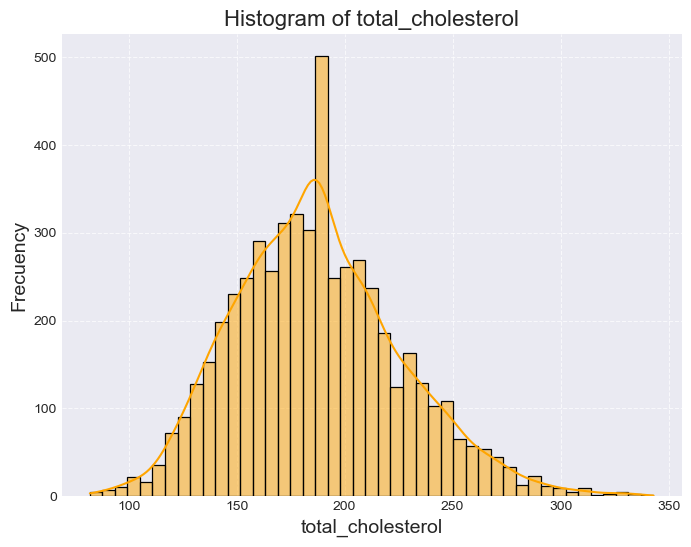

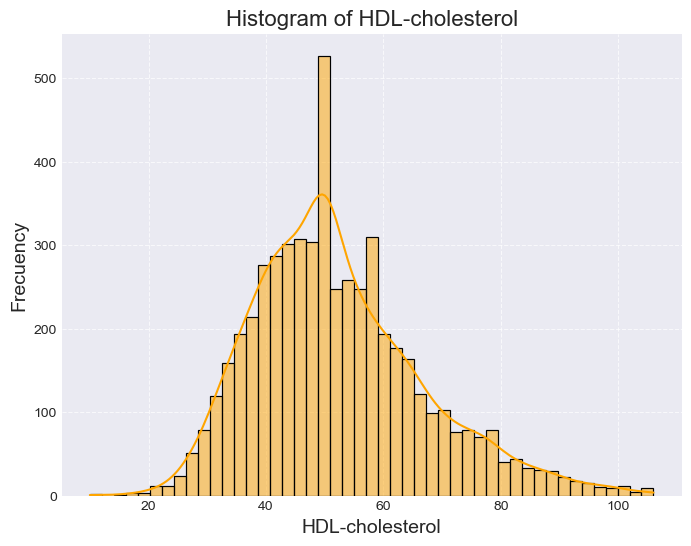

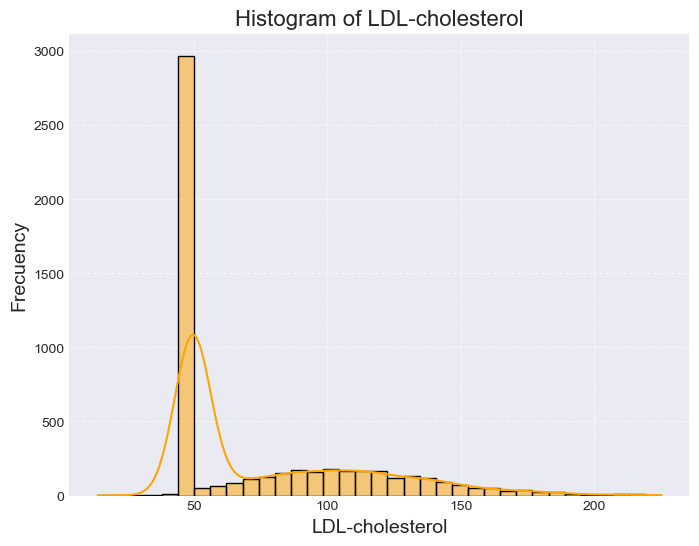

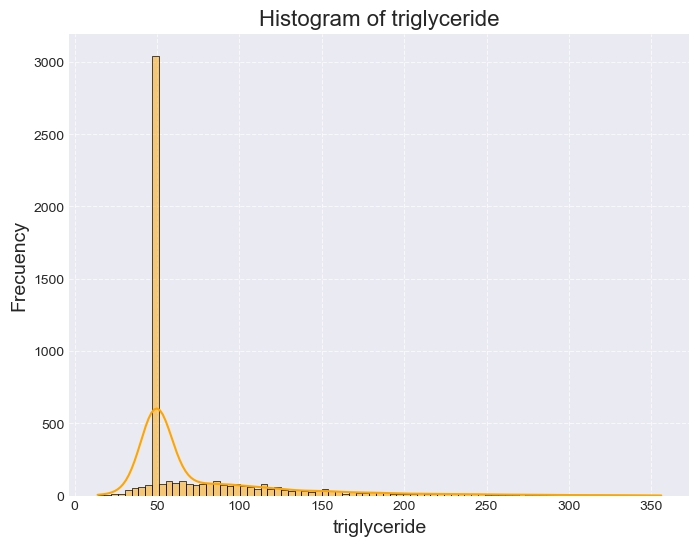

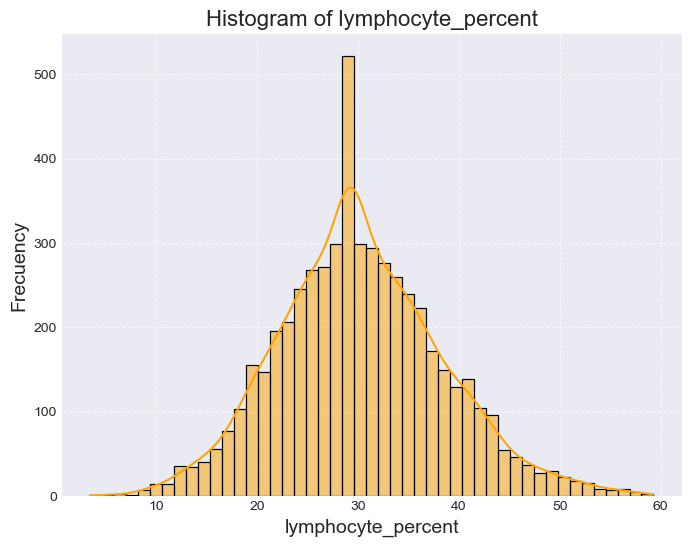

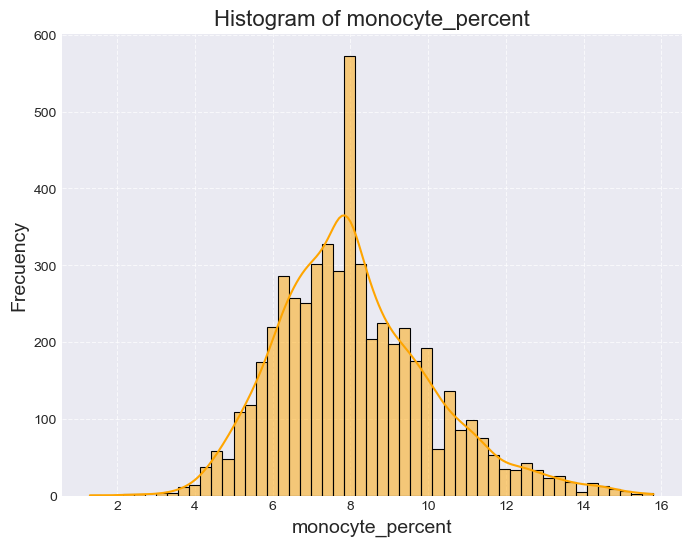

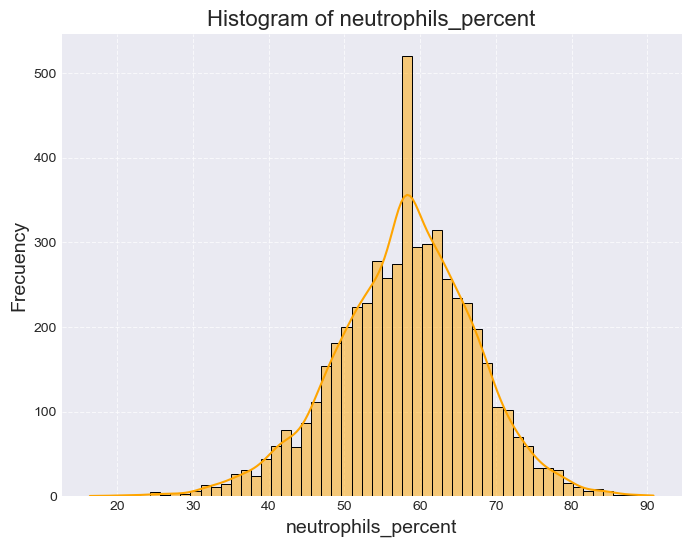

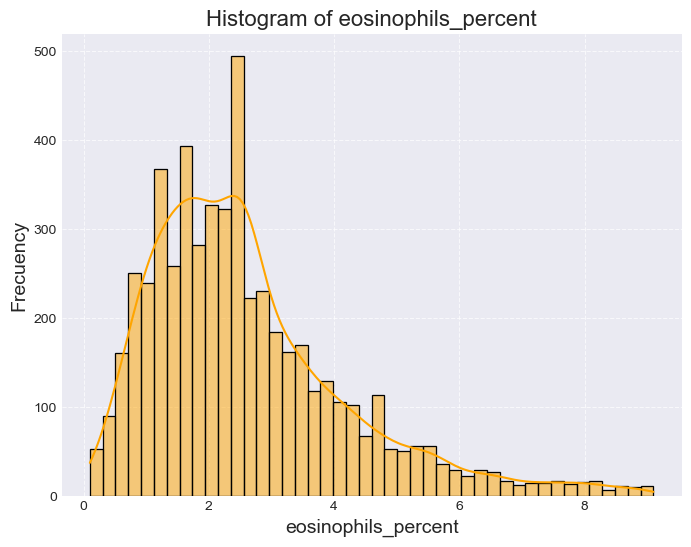

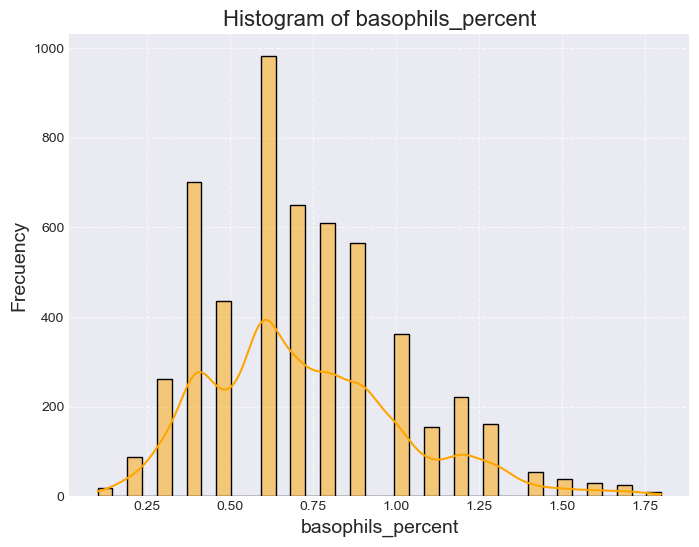

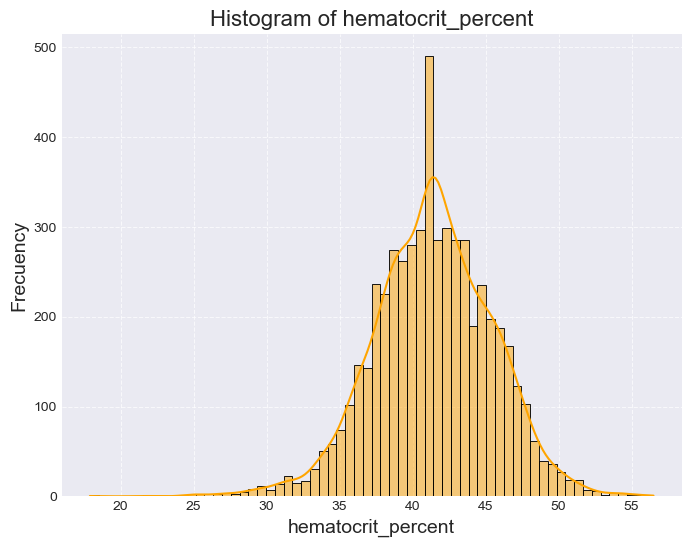

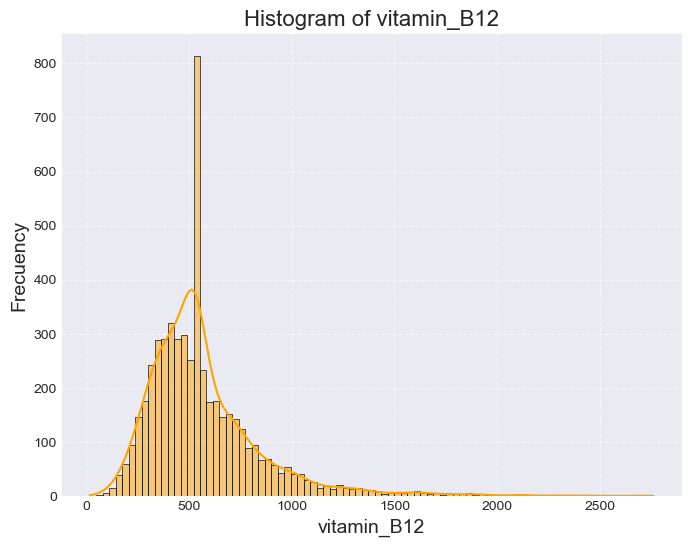

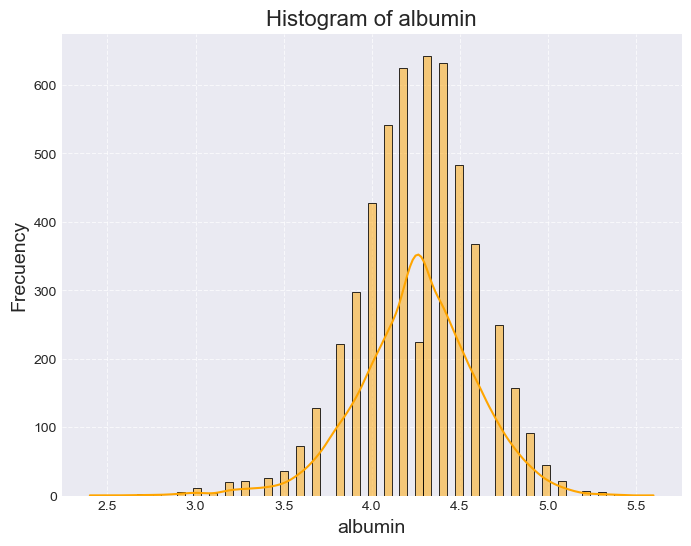

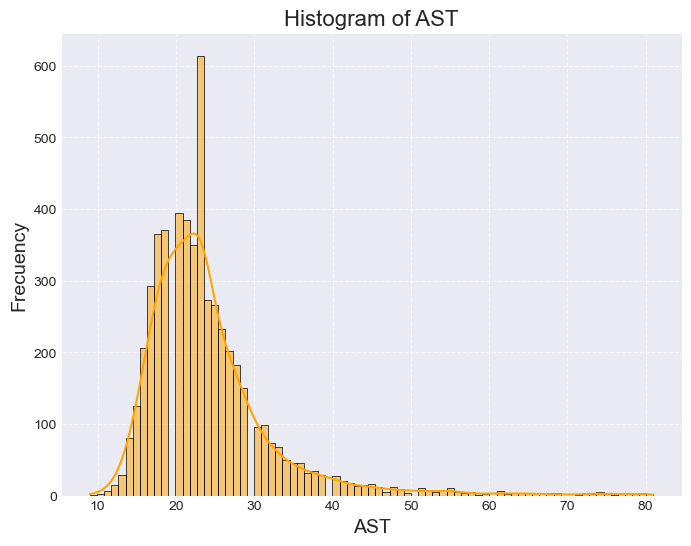

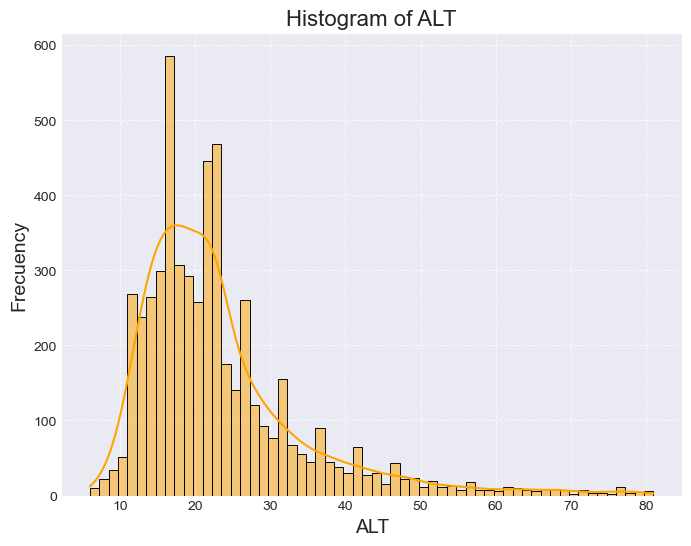

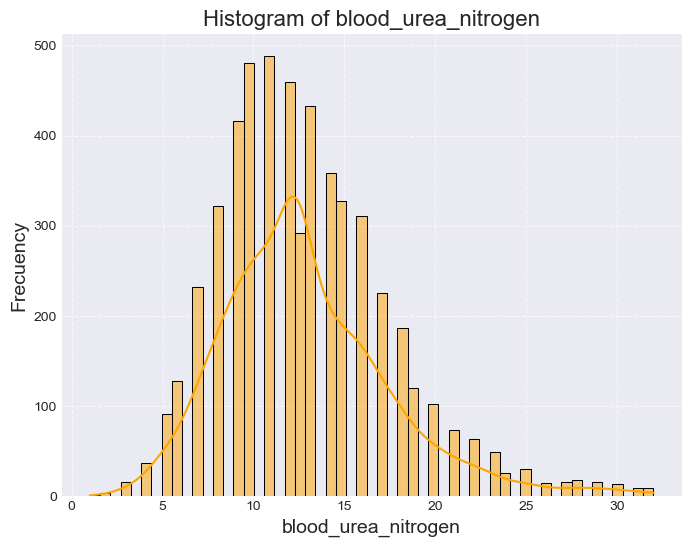

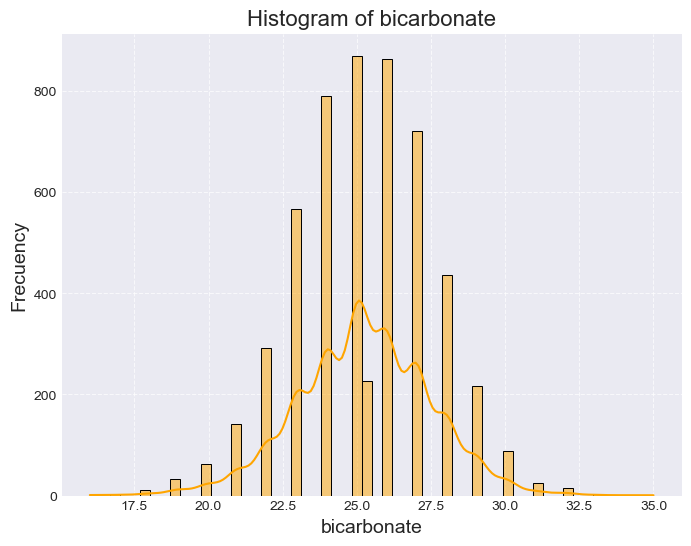

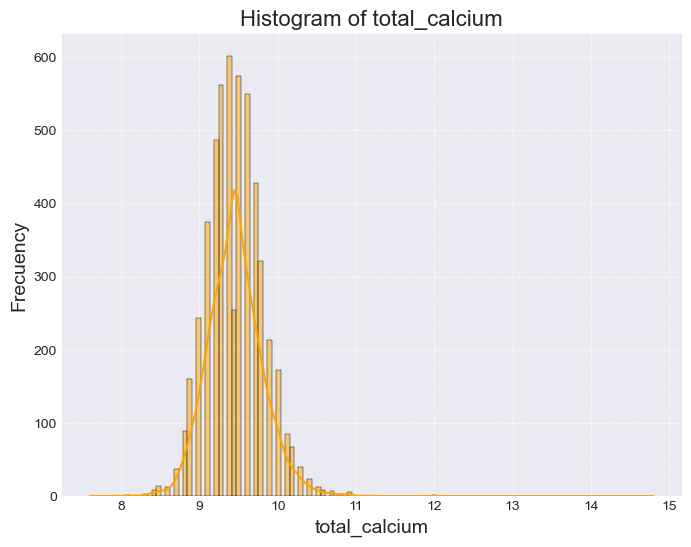

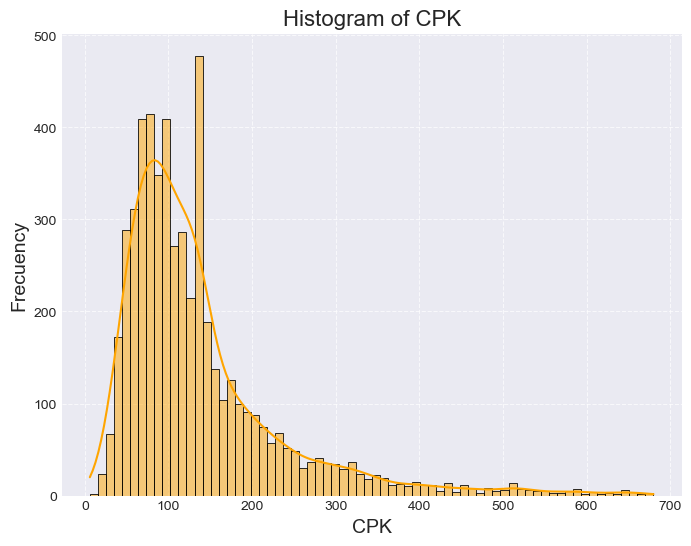

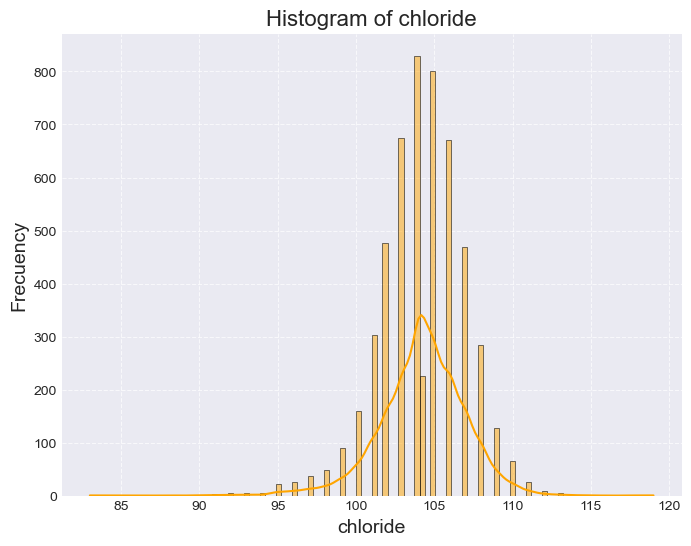

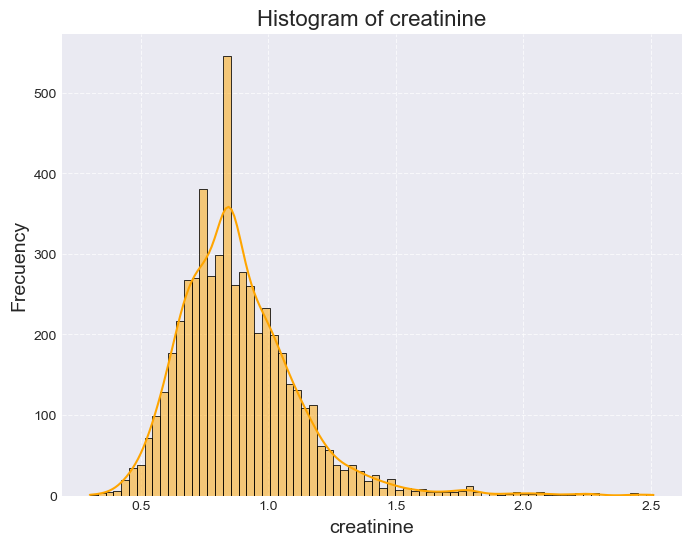

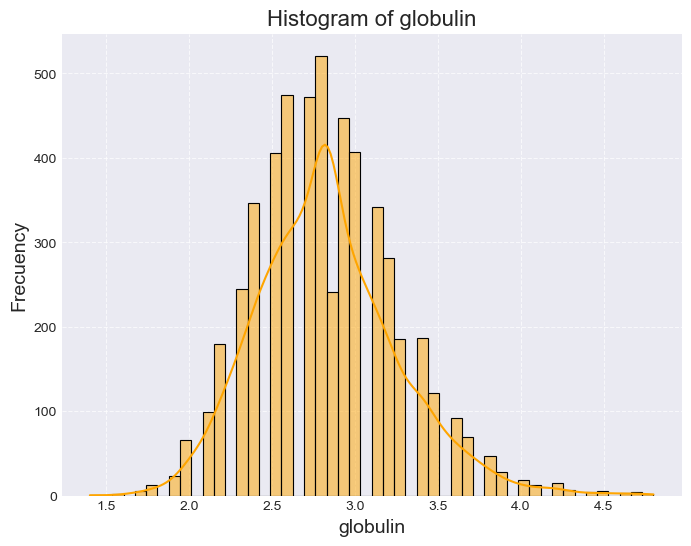

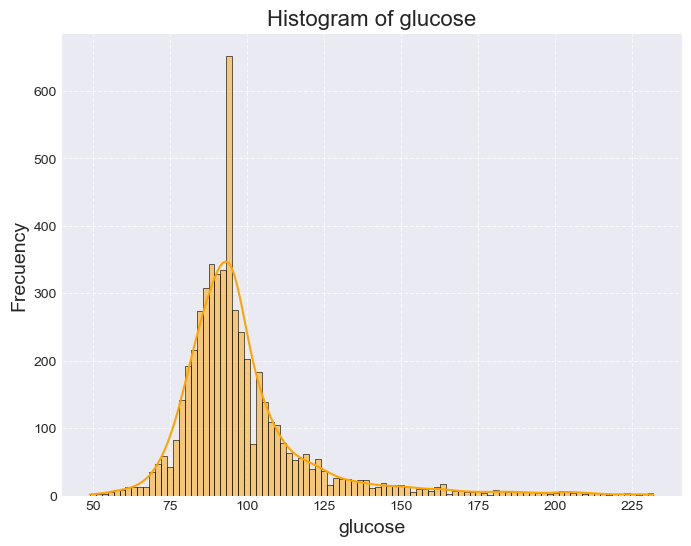

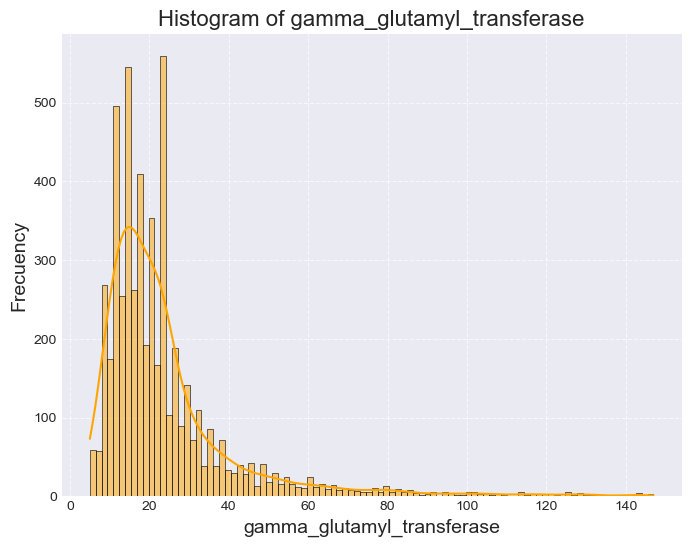

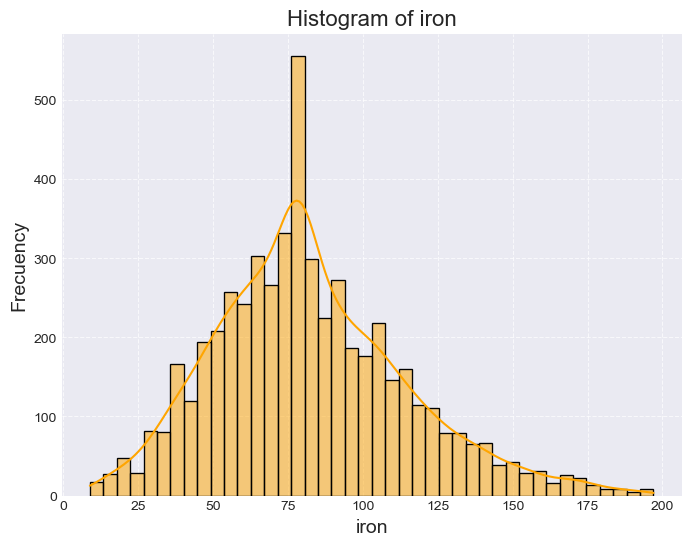

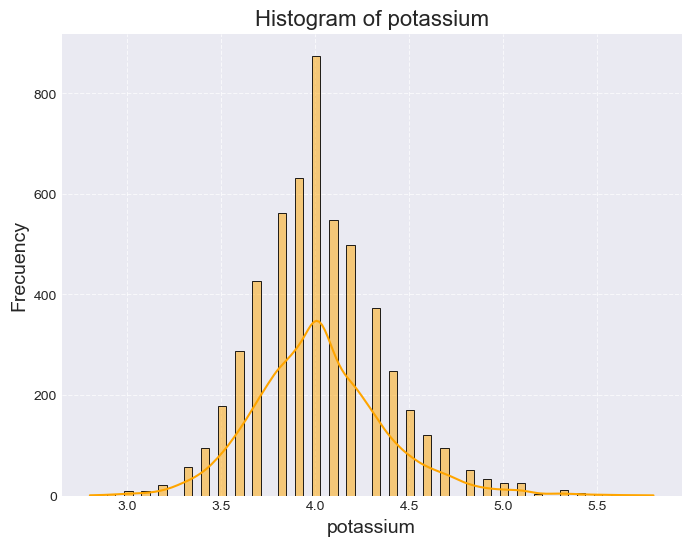

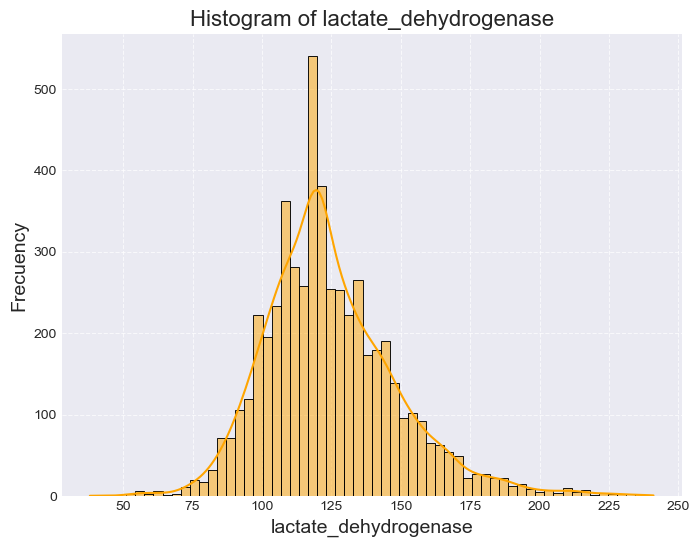

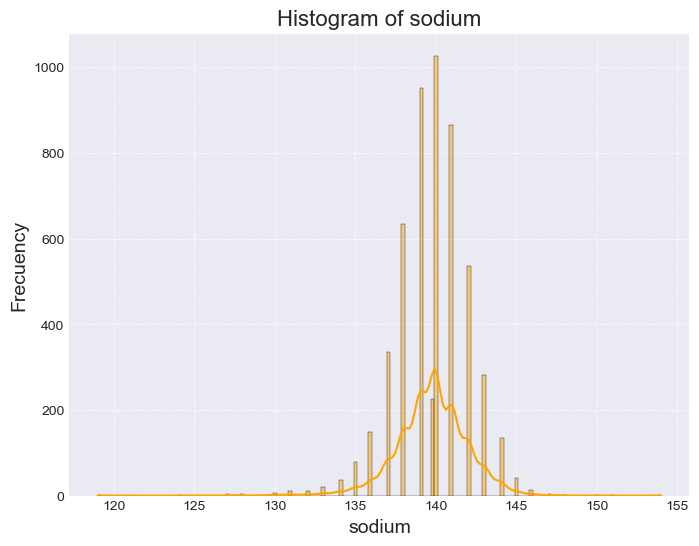

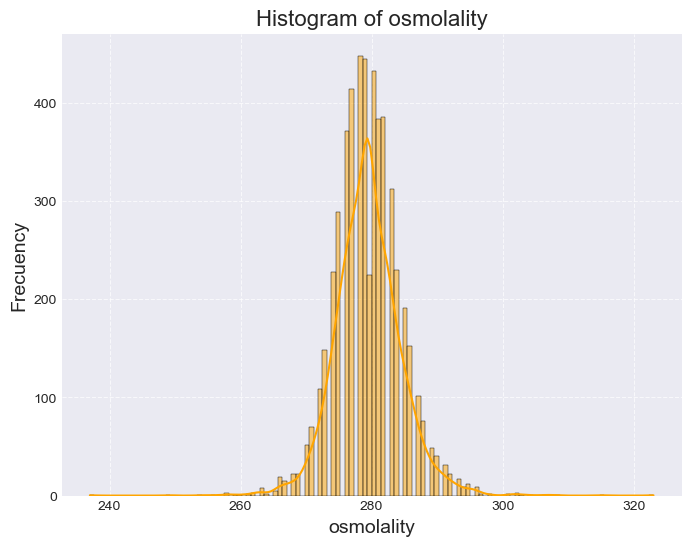

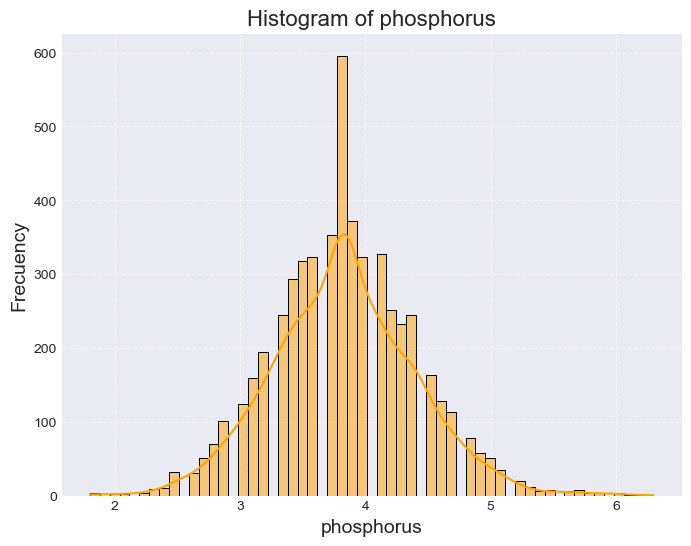

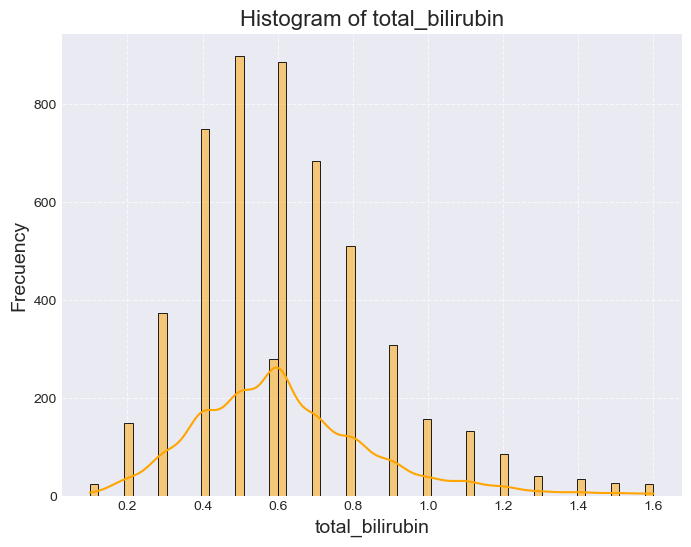

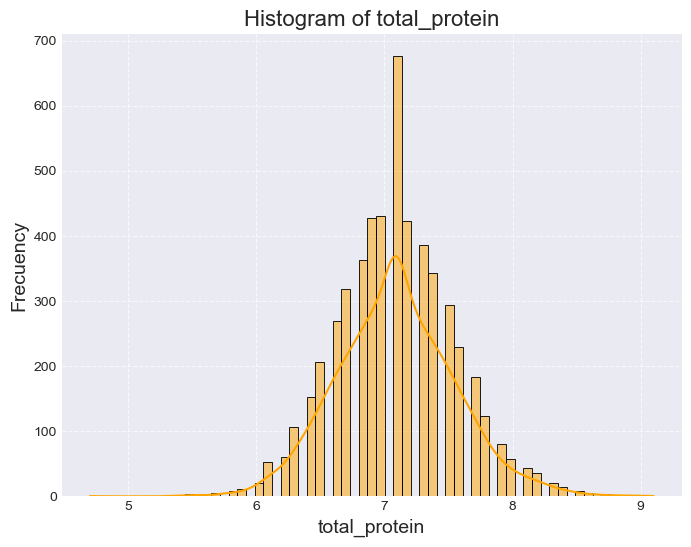

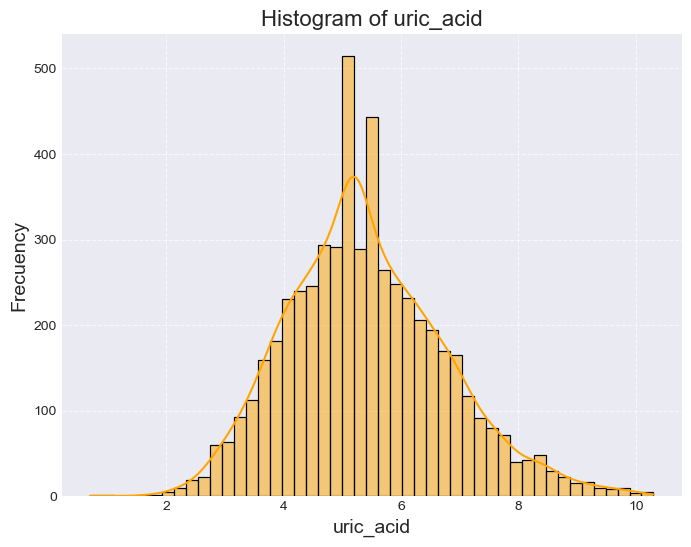

In [47]:
plt.style.use('seaborn-darkgrid')

for col in df_labs:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_labs[col], kde=True, color='orange')
    plt.title(f'Histogram of {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Frecuency', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

### Examination Data<a class="anchor" id="examination-data"></a>

Keep only the necessary columns

In [48]:
df_exam.columns.tolist()

['PEASCST1',
 'PEASCTM1',
 'PEASCCT1',
 'BPXCHR',
 'BPAARM',
 'BPACSZ',
 'BPXPLS',
 'BPXPULS',
 'BPXPTY',
 'BPXML1',
 'BPXSY1',
 'BPXDI1',
 'BPAEN1',
 'BPXSY2',
 'BPXDI2',
 'BPAEN2',
 'BPXSY3',
 'BPXDI3',
 'BPAEN3',
 'BPXSY4',
 'BPXDI4',
 'BPAEN4',
 'BMDSTATS',
 'BMXWT',
 'BMIWT',
 'BMXRECUM',
 'BMIRECUM',
 'BMXHEAD',
 'BMIHEAD',
 'BMXHT',
 'BMIHT',
 'BMXBMI',
 'BMDBMIC',
 'BMXLEG',
 'BMILEG',
 'BMXARML',
 'BMIARML',
 'BMXARMC',
 'BMIARMC',
 'BMXWAIST',
 'BMIWAIST',
 'BMXSAD1',
 'BMXSAD2',
 'BMXSAD3',
 'BMXSAD4',
 'BMDAVSAD',
 'BMDSADCM',
 'MGDEXSTS',
 'MGD050',
 'MGD060',
 'MGQ070',
 'MGQ080',
 'MGQ090',
 'MGQ100',
 'MGQ110',
 'MGQ120',
 'MGD130',
 'MGQ90DG',
 'MGDSEAT',
 'MGAPHAND',
 'MGATHAND',
 'MGXH1T1',
 'MGXH1T1E',
 'MGXH2T1',
 'MGXH2T1E',
 'MGXH1T2',
 'MGXH1T2E',
 'MGXH2T2',
 'MGXH2T2E',
 'MGXH1T3',
 'MGXH1T3E',
 'MGXH2T3',
 'MGXH2T3E',
 'MGDCGSZ',
 'OHDEXSTS',
 'OHDDESTS',
 'OHXIMP',
 'OHX01TC',
 'OHX02TC',
 'OHX03TC',
 'OHX04TC',
 'OHX05TC',
 'OHX06TC',
 'OHX07TC',
 'OHX08TC'

In [49]:
df_exam = df_exam[['BPXPLS','BPXSY1','BPXDI1','BMXBMI']].copy()

Replace column names and check the values of each column

In [50]:
new_column_names_exam = ['pulse','systolic_blood_pressure','diastoli_blood_pressure','BMI']
df_exam.columns = new_column_names_exam
df_exam.describe()

,pulse,systolic_blood_pressure,diastoli_blood_pressure,BMI
count,5240.000000,4956.000000,4956.000000,5316.000000
mean,72.659160,122.299435,69.345440,28.999059
std,11.855007,17.724086,12.815957,7.228320
min,40.000000,66.000000,0.000000,14.100000
25%,64.000000,110.000000,62.000000,23.900000
50%,72.000000,120.000000,70.000000,27.700000
75%,80.000000,132.000000,78.000000,32.400000
max,160.000000,228.000000,122.000000,82.900000


In [51]:
df_exam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5372 entries, 73557 to 83727
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   pulse                    5240 non-null   float64
 1   systolic_blood_pressure  4956 non-null   float64
 2   diastoli_blood_pressure  4956 non-null   float64
 3   BMI                      5316 non-null   float64
dtypes: float64(4)
memory usage: 209.8 KB


Explore for outliers in the dataset

In [52]:
detect_outliers_and_replace_with_nan(df_exam, columns=None)

Outliers in pulse: [110.0, 114.0, 114.0, 110.0, 110.0, 160.0, 118.0, 118.0, 112.0, 112.0, 120.0, 128.0, 112.0, 114.0, 114.0, 114.0, 114.0, 110.0, 132.0, 140.0, 120.0, 110.0, 112.0, 110.0, 114.0, 114.0, 114.0, 110.0, 140.0]
Replacing outliers in pulse with NAN.
Outliers in systolic_blood_pressure: [198.0, 176.0, 184.0, 180.0, 176.0, 198.0, 178.0, 176.0, 190.0, 188.0, 182.0, 180.0, 228.0, 186.0, 182.0, 186.0, 176.0, 184.0, 184.0, 204.0, 180.0, 190.0, 228.0, 190.0, 196.0, 180.0, 198.0, 176.0, 176.0, 180.0, 184.0, 186.0, 178.0, 66.0, 198.0, 184.0, 194.0, 186.0, 198.0, 180.0, 182.0, 178.0, 176.0, 178.0, 182.0, 182.0, 180.0, 176.0, 176.0, 186.0, 176.0, 220.0, 186.0, 184.0, 180.0, 208.0, 210.0, 188.0, 194.0]
Replacing outliers in systolic_blood_pressure with NAN.
Outliers in diastoli_blood_pressure: [0.0, 114.0, 0.0, 0.0, 0.0, 0.0, 26.0, 0.0, 28.0, 108.0, 110.0, 0.0, 0.0, 30.0, 0.0, 22.0, 30.0, 0.0, 118.0, 0.0, 0.0, 0.0, 112.0, 0.0, 116.0, 0.0, 0.0, 0.0, 0.0, 122.0, 112.0, 0.0, 0.0, 0.0, 28.0

,pulse,systolic_blood_pressure,diastoli_blood_pressure,BMI
SEQN,,,,
73557,86.0,122.0,72.0,26.7
73558,74.0,156.0,62.0,28.6
73559,68.0,140.0,90.0,28.9
73561,92.0,136.0,86.0,19.7
73562,60.0,160.0,84.0,41.7
...,...,...,...,...
83720,82.0,130.0,88.0,23.9
83721,64.0,108.0,70.0,25.6
83723,74.0,NaN,NaN,33.1


There are many outliers in the dataset  
Replace NaN values (outliers) with the mean

In [53]:
df_exam = df_exam.fillna(df_exam.mean())
df_exam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5372 entries, 73557 to 83727
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   pulse                    5372 non-null   float64
 1   systolic_blood_pressure  5372 non-null   float64
 2   diastoli_blood_pressure  5372 non-null   float64
 3   BMI                      5372 non-null   float64
dtypes: float64(4)
memory usage: 209.8 KB


In [54]:
df_exam.describe()

,pulse,systolic_blood_pressure,diastoli_blood_pressure,BMI
count,5372.000000,5372.000000,5372.000000,5372.000000
mean,72.407216,121.541760,69.726976,28.606543
std,11.191832,15.541823,10.876348,6.344432
min,40.000000,72.000000,32.000000,14.100000
25%,64.000000,110.000000,64.000000,24.000000
50%,72.000000,121.541760,69.726976,27.800000
75%,80.000000,130.000000,76.000000,32.000000
max,108.000000,174.000000,106.000000,50.600000


In [55]:
df_exam.head()

,pulse,systolic_blood_pressure,diastoli_blood_pressure,BMI
SEQN,,,,
73557,86.0,122.0,72.0,26.7
73558,74.0,156.0,62.0,28.6
73559,68.0,140.0,90.0,28.9
73561,92.0,136.0,86.0,19.7
73562,60.0,160.0,84.0,41.7


### Questionnaire Data<a class="anchor" id="questionnaire-data"></a>

#### Alcohol Use<a class="anchor" id="alcohol"></a>


Select variables, replace column names, and explore the data

In [56]:
df_alcohol = df_quest[['ALQ101','ALQ120Q','ALQ120U','ALQ151']].copy()
df_alcohol.head()

,ALQ101,ALQ120Q,ALQ120U,ALQ151
SEQN,,,,
73557,1.0,1.0,3.0,1.0
73558,1.0,7.0,1.0,1.0
73559,1.0,0.0,NaN,2.0
73561,1.0,0.0,NaN,2.0
73562,1.0,5.0,3.0,2.0


In [57]:
df_alcohol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5372 entries, 73557 to 83727
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ALQ101   5370 non-null   float64
 1   ALQ120Q  4453 non-null   float64
 2   ALQ120U  3582 non-null   float64
 3   ALQ151   4451 non-null   float64
dtypes: float64(4)
memory usage: 209.8 KB


Explore null values  
ALQ110: Had at least 12 alcohol drinks/lifetime?  
ALQ120Q: How often drink alcohol over past 12 mos  
ALQ120U: # days drink alcohol per wk, mo, yr  
ALQ151: Ever have 4/5 or more drinks every day?  

In [58]:
print_values_variables(df_alcohol)

ALQ101 value counts:
1.0    3771
2.0    1591
9.0       8
NaN       2
Name: ALQ101, dtype: int64
--------------------------------------------------
ALQ120Q value counts:
1.0      1042
NaN       919
2.0       884
0.0       867
3.0       521
4.0       302
5.0       263
7.0       193
6.0       141
10.0       70
12.0       24
20.0       24
15.0       22
8.0        22
30.0       20
14.0        6
365.0       6
24.0        4
9.0         4
999.0       4
25.0        4
28.0        2
100.0       2
16.0        2
11.0        2
80.0        2
40.0        2
61.0        1
13.0        1
180.0       1
120.0       1
96.0        1
160.0       1
112.0       1
18.0        1
182.0       1
17.0        1
305.0       1
45.0        1
90.0        1
350.0       1
300.0       1
52.0        1
200.0       1
35.0        1
Name: ALQ120Q, dtype: int64
--------------------------------------------------
ALQ120U value counts:
NaN    1790
1.0    1457
3.0    1174
2.0     951
Name: ALQ120U, dtype: int64
------------------------

In [59]:
df_alcohol[df_alcohol['ALQ120U'].isnull()  & (df_alcohol['ALQ120Q'] == 0.0)]

,ALQ101,ALQ120Q,ALQ120U,ALQ151
SEQN,,,,
73559,1.0,0.0,NaN,2.0
73561,1.0,0.0,NaN,2.0
73581,2.0,0.0,NaN,2.0
73597,2.0,0.0,NaN,2.0
73607,1.0,0.0,NaN,2.0
...,...,...,...,...
83663,1.0,0.0,NaN,2.0
83665,2.0,0.0,NaN,2.0
83715,1.0,0.0,NaN,1.0


In [60]:
df_alcohol[df_alcohol['ALQ120Q'].isnull() & df_alcohol['ALQ151'].isnull()]

,ALQ101,ALQ120Q,ALQ120U,ALQ151
SEQN,,,,
73574,2.0,NaN,NaN,NaN
73578,2.0,NaN,NaN,NaN
73592,2.0,NaN,NaN,NaN
73603,2.0,NaN,NaN,NaN
73633,2.0,NaN,NaN,NaN
...,...,...,...,...
83677,2.0,NaN,NaN,NaN
83683,2.0,NaN,NaN,NaN
83701,2.0,NaN,NaN,NaN


Explore correlation between ALQ120Q, ALQ120U, and ALQ151 columns.  
Individuals reporting 0 drinks last year have null values in ALQ120U and ALQ151.  
For remaining null values in ALQ120Q, we observed a consistent pattern with ALQ120U.  
Decision: Convert all null values to 0.

In [61]:
df_alcohol.fillna(0, inplace=True)

In [62]:
print_values_variables(df_alcohol)

ALQ101 value counts:
1.0    3771
2.0    1591
9.0       8
0.0       2
Name: ALQ101, dtype: int64
--------------------------------------------------
ALQ120Q value counts:
0.0      1786
1.0      1042
2.0       884
3.0       521
4.0       302
5.0       263
7.0       193
6.0       141
10.0       70
12.0       24
20.0       24
8.0        22
15.0       22
30.0       20
14.0        6
365.0       6
999.0       4
25.0        4
24.0        4
9.0         4
100.0       2
28.0        2
11.0        2
16.0        2
80.0        2
40.0        2
350.0       1
200.0       1
120.0       1
180.0       1
61.0        1
112.0       1
13.0        1
96.0        1
160.0       1
90.0        1
182.0       1
52.0        1
17.0        1
305.0       1
300.0       1
45.0        1
18.0        1
35.0        1
Name: ALQ120Q, dtype: int64
--------------------------------------------------
ALQ120U value counts:
0.0    1790
1.0    1457
3.0    1174
2.0     951
Name: ALQ120U, dtype: int64
--------------------------------------

In 'ALQ120Q' and 'ALQ120U' columns, frequencies and number of drinks consumed vary (per day, week, or month).  
Compute the total number of drinks over the past year.

In [63]:
df_alcohol['ALQ120U'].replace({1: 52, 
                               2: 12, 
                               3:1})
df_alcohol['number_drinks_last_year'] = df_alcohol['ALQ120Q'] * df_alcohol['ALQ120U']
df_alcohol.head()

,ALQ101,ALQ120Q,ALQ120U,ALQ151,number_drinks_last_year
SEQN,,,,,
73557,1.0,1.0,3.0,1.0,3.0
73558,1.0,7.0,1.0,1.0,7.0
73559,1.0,0.0,0.0,2.0,0.0
73561,1.0,0.0,0.0,2.0,0.0
73562,1.0,5.0,3.0,2.0,15.0


Rename columns and delete columns no longer needed

In [64]:
df_alcohol = df_alcohol.drop(['ALQ120Q','ALQ120U'], axis=1)
df_alcohol = df_alcohol.rename(columns={'ALQ101': 'alcohol_lifetime', 'ALQ151': 'binge_drinking_lifetime'})
df_alcohol.head()

,alcohol_lifetime,binge_drinking_lifetime,number_drinks_last_year
SEQN,,,
73557,1.0,1.0,3.0
73558,1.0,1.0,7.0
73559,1.0,2.0,0.0
73561,1.0,2.0,0.0
73562,1.0,2.0,15.0


Replace data in the first 2 columns

In [65]:
print_values_variables(df_alcohol)

alcohol_lifetime value counts:
1.0    3771
2.0    1591
9.0       8
0.0       2
Name: alcohol_lifetime, dtype: int64
--------------------------------------------------
binge_drinking_lifetime value counts:
2.0    3717
0.0     921
1.0     733
9.0       1
Name: binge_drinking_lifetime, dtype: int64
--------------------------------------------------
number_drinks_last_year value counts:
0.0       1790
2.0        751
3.0        453
1.0        440
4.0        422
6.0        349
9.0        168
7.0        166
12.0       148
15.0       120
5.0        113
18.0       100
30.0        68
8.0         59
10.0        30
60.0        24
36.0        23
24.0        21
21.0        21
45.0        18
90.0        18
14.0         6
20.0         6
1095.0       6
72.0         4
27.0         4
42.0         4
16.0         3
50.0         3
28.0         2
300.0        2
120.0        2
240.0        2
40.0         2
48.0         2
39.0         1
336.0        1
360.0        1
183.0        1
540.0        1
84.0         1

In [66]:
df_alcohol['alcohol_lifetime'].replace({1.0: 'Yes',
                                        2.0: 'No',
                                        9.0: 'No',
                                        0.0: 'No'},inplace=True)

In [67]:
df_alcohol['binge_drinking_lifetime'].replace({1.0: 'Yes',
                                               2.0: 'No',
                                               9.0: 'No',
                                               0.0: 'No'},inplace=True)

Convert data to int type

In [68]:
df_alcohol['number_drinks_last_year'] = df_alcohol['number_drinks_last_year'].astype('int64')

In [69]:
print_values_variables(df_alcohol)

alcohol_lifetime value counts:
Yes    3771
No     1601
Name: alcohol_lifetime, dtype: int64
--------------------------------------------------
binge_drinking_lifetime value counts:
No     4639
Yes     733
Name: binge_drinking_lifetime, dtype: int64
--------------------------------------------------
number_drinks_last_year value counts:
0       1790
2        751
3        453
1        440
4        422
6        349
9        168
7        166
12       148
15       120
5        113
18       100
30        68
8         59
10        30
60        24
36        23
24        21
21        21
45        18
90        18
14         6
20         6
1095       6
72         4
27         4
42         4
16         3
50         3
28         2
300        2
120        2
240        2
40         2
48         2
39         1
336        1
360        1
183        1
540        1
84         1
105        1
33         1
288        1
900        1
480        1
546        1
22         1
51         1
915        1
135        1

In [70]:
df_alcohol.head()

,alcohol_lifetime,binge_drinking_lifetime,number_drinks_last_year
SEQN,,,
73557,Yes,Yes,3
73558,Yes,Yes,7
73559,Yes,No,0
73561,Yes,No,0
73562,Yes,No,15


In [71]:
df_alcohol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5372 entries, 73557 to 83727
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   alcohol_lifetime         5372 non-null   object
 1   binge_drinking_lifetime  5372 non-null   object
 2   number_drinks_last_year  5372 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 167.9+ KB


#### Smoking<a class="anchor" id="smoking"></a>

Select variables, explore the data, and replace column names

SMD030: Age started smoking cigarettes regularly   
SMQ020: Smoked at least 100 cigarettes in life   
SMD641: # days smoked cigs during past 30 days   
SMD650: Avg # cigarettes/day during past 30 days

In [72]:
df_smoking = df_quest[['SMD030','SMQ020','SMD641','SMD650']].copy()
df_smoking.head()

,SMD030,SMQ020,SMD641,SMD650
SEQN,,,,
73557,17.0,1.0,NaN,NaN
73558,0.0,1.0,1.0,1.0
73559,20.0,1.0,NaN,NaN
73561,NaN,2.0,NaN,NaN
73562,18.0,1.0,NaN,NaN


In [73]:
print_values_variables(df_smoking)

SMD030 value counts:
NaN      3119
18.0      311
16.0      294
17.0      221
15.0      212
14.0      155
20.0      139
19.0      131
13.0      115
0.0       108
21.0       79
22.0       72
12.0       72
25.0       63
23.0       34
30.0       34
10.0       25
11.0       23
24.0       21
9.0        21
27.0       14
28.0       14
26.0       12
8.0        11
40.0       11
7.0         7
35.0        7
29.0        5
32.0        5
31.0        5
999.0       5
45.0        4
37.0        3
46.0        3
43.0        2
42.0        2
34.0        2
36.0        2
33.0        2
49.0        1
38.0        1
39.0        1
41.0        1
44.0        1
64.0        1
48.0        1
Name: SMD030, dtype: int64
--------------------------------------------------
SMQ020 value counts:
2.0    3117
1.0    2253
9.0       2
Name: SMQ020, dtype: int64
--------------------------------------------------
SMD641 value counts:
NaN     4316
30.0     792
15.0      43
20.0      32
10.0      26
3.0       21
4.0       19
25.0      

Observe a significant number of null values; treat them as 0 or negative values

In [74]:
df_smoking = df_smoking.fillna(0)

Compute the total number of cigarettes smoked over the past month

In [75]:
df_smoking['number_cigarettes_last_month'] = df_smoking['SMD641'] * df_smoking['SMD650']
df_smoking.head()

,SMD030,SMQ020,SMD641,SMD650,number_cigarettes_last_month
SEQN,,,,,
73557,17.0,1.0,0.0,0.0,0.0
73558,0.0,1.0,1.0,1.0,1.0
73559,20.0,1.0,0.0,0.0,0.0
73561,0.0,2.0,0.0,0.0,0.0
73562,18.0,1.0,0.0,0.0,0.0


Replace names and delete columns no longer needed

In [76]:
df_smoking = df_smoking.drop(['SMD641','SMD650'],axis=1)
df_smoking = df_smoking.rename(columns={'SMD030': 'age_started_smoking', 'SMQ020': 'smoke_lifetime'})
df_smoking['age_started_smoking'].replace({999.0: 0,},inplace=True)
df_smoking['smoke_lifetime'].replace({1.0: 'Yes',
                                      2.0: 'No',
                                      3.0: 'No',
                                      9.0: 'No'},inplace=True)
df_smoking[['age_started_smoking','number_cigarettes_last_month']] = df_smoking[['age_started_smoking','number_cigarettes_last_month']].astype('int64')

Check for outliers in the dataset

In [77]:
detect_outliers_and_replace_with_nan(df_smoking, columns=['number_cigarettes_last_month'])

Outliers in number_cigarettes_last_month: [14985, 29970, 2700]
Replacing outliers in number_cigarettes_last_month with NAN.


,age_started_smoking,smoke_lifetime,number_cigarettes_last_month
SEQN,,,
73557,17,Yes,0.0
73558,0,Yes,1.0
73559,20,Yes,0.0
73561,0,No,0.0
73562,18,Yes,0.0
...,...,...,...
83720,0,No,0.0
83721,0,No,0.0
83723,0,No,0.0


Replace null values with 0

In [78]:
df_smoking.fillna(0, inplace=True)
df_smoking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5372 entries, 73557 to 83727
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age_started_smoking           5372 non-null   int64  
 1   smoke_lifetime                5372 non-null   object 
 2   number_cigarettes_last_month  5372 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 167.9+ KB


#### Sleeping<a class="anchor" id="sleeping"></a>

Select variables, explore the data, and replace column names

SLD010H: How much sleep do you get (hours)?  
SLQ050 : Ever told doctor had trouble sleeping?  

In [79]:
df_sleep = df_quest[['SLD010H','SLQ050']].copy()
df_sleep.head()

,SLD010H,SLQ050
SEQN,,
73557,7.0,1.0
73558,9.0,2.0
73559,8.0,2.0
73561,9.0,2.0
73562,5.0,2.0


In [80]:
df_sleep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5372 entries, 73557 to 83727
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SLD010H  5369 non-null   float64
 1   SLQ050   5372 non-null   float64
dtypes: float64(2)
memory usage: 125.9 KB


In [81]:
print_values_variables(df_sleep)

SLD010H value counts:
8.0     1448
7.0     1432
6.0     1293
5.0      475
9.0      289
4.0      207
10.0     128
3.0       33
12.0      31
2.0       21
11.0       8
99.0       4
NaN        3
Name: SLD010H, dtype: int64
--------------------------------------------------
SLQ050 value counts:
2.0    3955
1.0    1416
9.0       1
Name: SLQ050, dtype: int64
--------------------------------------------------


Observe a minimal number of null values, specifically in the 'SLD010H' column.  
Replace these null values with the mean of the column.

In [82]:
mean_sleep = df_sleep['SLD010H'].mean()
df_sleep['SLD010H'] = df_sleep['SLD010H'].fillna(mean_sleep)
df_sleep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5372 entries, 73557 to 83727
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SLD010H  5372 non-null   float64
 1   SLQ050   5372 non-null   float64
dtypes: float64(2)
memory usage: 125.9 KB


Rename columns

In [83]:
df_sleep = df_sleep.rename(columns={'SLD010H': 'hours_sleep', 'SLQ050': 'trouble_sleeping_history'})
df_sleep['hours_sleep'].replace({99.0: mean_sleep,},inplace=True)
df_sleep['trouble_sleeping_history'].replace({1.0: 'Yes',
                                              2.0: 'No',
                                              9.0: 'No'},inplace=True)
df_sleep['hours_sleep'] = df_sleep['hours_sleep'].astype('int64')
print_values_variables(df_sleep)

hours_sleep value counts:
8     1448
7     1432
6     1300
5      475
9      289
4      207
10     128
3       33
12      31
2       21
11       8
Name: hours_sleep, dtype: int64
--------------------------------------------------
trouble_sleeping_history value counts:
No     3956
Yes    1416
Name: trouble_sleeping_history, dtype: int64
--------------------------------------------------


Check for outliers in the dataset

In [84]:
df_sleep.describe()

,hours_sleep
count,5372.000000
mean,6.904877
std,1.413186
min,2.000000
25%,6.000000
50%,7.000000
75%,8.000000
max,12.000000


#### Physical Activity<a class="anchor" id="physical-activity"></a>

Select variables, explore the data, and replace column names

PAQ605: Vigorous work activity in a week  
PAQ620: Moderate work activity in a week  
PAQ650: Vigorous recreational activities in a week  
PAQ665: Moderate recreational activities in a week  
PAD680: Minutes sedentary activity in a day


In [85]:
df_physical_activity = df_quest[['PAQ605','PAQ620','PAQ650','PAQ665','PAD680']].copy()
df_physical_activity.head()

,PAQ605,PAQ620,PAQ650,PAQ665,PAD680
SEQN,,,,,
73557,2.0,2.0,2.0,2.0,600.0
73558,2.0,1.0,2.0,2.0,540.0
73559,2.0,1.0,2.0,1.0,300.0
73561,2.0,1.0,2.0,2.0,480.0
73562,1.0,2.0,2.0,2.0,360.0


In [86]:
print_values_variables(df_physical_activity)

PAQ605 value counts:
2.0    4363
1.0    1009
Name: PAQ605, dtype: int64
--------------------------------------------------
PAQ620 value counts:
2.0    3538
1.0    1832
9.0       2
Name: PAQ620, dtype: int64
--------------------------------------------------
PAQ650 value counts:
2.0    4092
1.0    1280
Name: PAQ650, dtype: int64
--------------------------------------------------
PAQ665 value counts:
2.0    3111
1.0    2261
Name: PAQ665, dtype: int64
--------------------------------------------------
PAD680 value counts:
480.0     1148
600.0      582
360.0      570
240.0      542
300.0      507
180.0      373
720.0      327
120.0      310
540.0      272
420.0      254
60.0        98
660.0       89
840.0       77
900.0       53
780.0       42
960.0       41
9999.0      17
1080.0      17
30.0        12
90.0        10
NaN          5
1020.0       5
20.0         4
150.0        3
15.0         3
1200.0       2
105.0        1
490.0        1
10.0         1
1140.0       1
25.0         1
0.0       

Identify no null values in binary columns. Treat 2 unknown answers in 'PAQ620' as negative responses.  Rename columns and corresponding data for clarity.

In [87]:
df_physical_activity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5372 entries, 73557 to 83727
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PAQ605  5372 non-null   float64
 1   PAQ620  5372 non-null   float64
 2   PAQ650  5372 non-null   float64
 3   PAQ665  5372 non-null   float64
 4   PAD680  5367 non-null   float64
dtypes: float64(5)
memory usage: 251.8 KB


In [88]:
df_physical_activity = df_physical_activity.rename(columns={'PAQ605': 'vigorous_work_activity', 
                                                     'PAQ620': 'moderate_work_activity',
                                                     'PAQ650': 'vigorous_recreational_activities',
                                                     'PAQ665': 'moderate_recreational_activities',
                                                     'PAD680': 'minutes_sedentary_activity'})
df_physical_activity[['vigorous_work_activity',
                      'moderate_work_activity',
                      'vigorous_recreational_activities',
                      'moderate_recreational_activities']] = df_physical_activity[['vigorous_work_activity',
                                                                                   'moderate_work_activity',
                                                                                   'vigorous_recreational_activities',
                                                                                   'moderate_recreational_activities']].replace({1.0: 1,
                                                                                                                                 2.0: 0,
                                                                                                                                 9.0: 0})

In [89]:
df_physical_activity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5372 entries, 73557 to 83727
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   vigorous_work_activity            5372 non-null   float64
 1   moderate_work_activity            5372 non-null   float64
 2   vigorous_recreational_activities  5372 non-null   float64
 3   moderate_recreational_activities  5372 non-null   float64
 4   minutes_sedentary_activity        5367 non-null   float64
dtypes: float64(5)
memory usage: 251.8 KB


Explore the numerical column 'minutes_sedentary_activity'

In [90]:
df_physical_activity.describe()

,vigorous_work_activity,moderate_work_activity,vigorous_recreational_activities,moderate_recreational_activities,minutes_sedentary_activity
count,5372.000000,5372.000000,5372.000000,5372.000000,5367.000000
mean,0.187826,0.341028,0.238273,0.420886,452.702627
std,0.390609,0.474099,0.426066,0.493747,573.360215
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,240.000000
50%,0.000000,0.000000,0.000000,0.000000,420.000000
75%,0.000000,1.000000,0.000000,1.000000,540.000000
max,1.000000,1.000000,1.000000,1.000000,9999.000000


Observe outliers in the 'minutes_sedentary_activity' column

In [91]:
detect_outliers_and_replace_with_nan(df_physical_activity, columns=['minutes_sedentary_activity'])

Outliers in minutes_sedentary_activity: [9999.0, 9999.0, 9999.0, 9999.0, 9999.0, 9999.0, 9999.0, 9999.0, 9999.0, 9999.0, 9999.0, 9999.0, 9999.0, 9999.0, 9999.0, 9999.0, 9999.0]
Replacing outliers in minutes_sedentary_activity with NAN.


,vigorous_work_activity,moderate_work_activity,vigorous_recreational_activities,moderate_recreational_activities,minutes_sedentary_activity
SEQN,,,,,
73557,0.0,0.0,0.0,0.0,600.0
73558,0.0,1.0,0.0,0.0,540.0
73559,0.0,1.0,0.0,1.0,300.0
73561,0.0,1.0,0.0,0.0,480.0
73562,1.0,0.0,0.0,0.0,360.0
...,...,...,...,...,...
83720,0.0,0.0,1.0,0.0,420.0
83721,0.0,0.0,1.0,1.0,240.0
83723,0.0,0.0,0.0,1.0,360.0


Replace outliers in the 'minutes_sedentary_activity' column with the mean of the dataset

In [92]:
df_physical_activity.fillna(0, inplace=True)

In [93]:
df_physical_activity = df_physical_activity.astype('int64')

Create categories for each physical activity level (sedentary, moderately_active, active)  
Drop columns no longer needed

In [94]:
conditions_physical_activity = [
    (df_physical_activity['vigorous_work_activity'] == 1) | (df_physical_activity['vigorous_recreational_activities'] == 1),
    (df_physical_activity['moderate_work_activity'] == 1) | (df_physical_activity['moderate_recreational_activities'] == 1),
    (df_physical_activity['vigorous_work_activity'] == 0) & (df_physical_activity['vigorous_recreational_activities'] == 0) &
    (df_physical_activity['moderate_work_activity'] == 0) & (df_physical_activity['moderate_recreational_activities'] == 0)
]
categories_physical_activity = ['active', 'moderately_active', 'sedentary']
df_physical_activity['physical_activity_level'] = np.select(conditions_physical_activity, categories_physical_activity, default='unknown')
df_physical_activity = df_physical_activity.drop(['vigorous_work_activity','vigorous_recreational_activities','moderate_work_activity','moderate_recreational_activities'], axis=1)
df_physical_activity.head()

,minutes_sedentary_activity,physical_activity_level
SEQN,,
73557,600,sedentary
73558,540,moderately_active
73559,300,moderately_active
73561,480,moderately_active
73562,360,active


### Dietary Data<a class="anchor" id="dietary-data"></a>

In [95]:
df_diet.head()

,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MNRSP,...,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V
SEQN,,,,,,,,,,,,,,,,,,,,,
73557,16888.327864,12930.890649,1,49.0,2.0,2.0,6.0,2.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73558,17932.143865,12684.148869,1,59.0,2.0,2.0,4.0,1.0,1.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
73559,59641.812930,39394.236709,1,49.0,2.0,2.0,18.0,6.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73561,59052.357033,39004.892993,1,63.0,2.0,2.0,18.0,1.0,1.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
73562,49890.828664,0.000000,1,49.0,2.0,1.0,11.0,3.0,1.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0


In [96]:
df_diet.isnull().sum()

WTDRD1         0
WTDR2D       291
DR1DRSTZ       0
DR1EXMER     266
DRABF        291
            ... 
DRD370T     1856
DRD370TQ    4483
DRD370U     1856
DRD370UQ    5148
DRD370V     1856
Length: 167, dtype: int64

#### Calorie Needs per Day, Age, Sex & Physical Activity <a class="anchor" id="calories"></a>

Store and explore the needed columns for estimated_calories (gender, age, physical_activity)

In [97]:
df_estimated_calories = pd.concat([
    df_dem[['gender', 'age']],  
    df_physical_activity[['physical_activity_level']]
], axis=1)
df_estimated_calories.head()

,gender,age,physical_activity_level
SEQN,,,
73557,male,69,sedentary
73558,male,54,moderately_active
73559,male,72,moderately_active
73561,female,73,moderately_active
73562,male,56,active


In [98]:
df_estimated_calories.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5372 entries, 73557 to 83727
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   gender                   5372 non-null   object
 1   age                      5372 non-null   int64 
 2   physical_activity_level  5372 non-null   object
dtypes: int64(1), object(2)
memory usage: 167.9+ KB


Calculate calorie needs based on gender, age, and physical activity.  
Recommended values sourced from https://health.gov/sites/default/files/2019-09/2015-2020_Dietary_Guidelines.pdf







In [99]:
def recommended_calorie_needs(gender, age, physical_activity):
    """
    Calculate recommended calorie needs based on gender, age, and physical activity level.

    Parameters:
    - gender (str): 'male' or 'female'.
    - age (int): Age in years.
    - physical_activity (str): 'sedentary', 'moderately_active', or 'active'.

    Returns:
    - np.ndarray: Recommended calorie needs based on the specified parameters.
    """
    
    # Define age ranges
    age_ranges = [(18, 18), (19, 20), (21, 25), (26, 30), (31, 35), (36, 40), (41, 45),
                  (46, 50), (51, 55), (56, 60), (61, 65), (66, 75), (75, float('inf'))]

    # Convert age to integer
    age = int(age)

    # Define recommended calorie values for men and women
    sedentary_values = {
        'male': [2400, 2800, 2400, 2400, 2400, 2400, 2200, 2200, 2200, 2200, 2000, 2000, 2000],
        'female': [1800, 2000, 2000, 1800, 1800, 1800, 1800, 1800, 1600, 1600, 1600, 1600, 1600]
    }

    moderately_active_values = {
        'male': [2800, 2800, 2800, 2600, 2600, 2600, 2600, 2400, 2400, 2400, 2400, 2200, 2200],
        'female': [2000, 2200, 2200, 2000, 2000, 2000, 2000, 2000, 1800, 1800, 1800, 1800, 1800]
    }

    active_values = {
        'male': [3200, 3000, 3000, 3000, 3000, 2800, 2800, 2800, 2800, 2600, 2600, 2600, 2400],
        'female': [2400, 2400, 2400, 2400, 2200, 2200, 2200, 2200, 2200, 2200, 2000, 2000, 2000]
    }

    # Determine the index of the age range
    age_index = next((i for i, (start, end) in enumerate(age_ranges) if start <= age <= end), None)

    if age_index is not None:
        # Define conditions for sedentary, moderately active, and active
        conditions = [
            (physical_activity == 'sedentary'),
            (physical_activity == 'moderately_active'),
            (physical_activity == 'active')
        ]

        # Select recommended calorie values based on gender and activity level
        values = [
            sedentary_values[gender][age_index],
            moderately_active_values[gender][age_index],
            active_values[gender][age_index]
        ]

        # Return the recommended calorie value
        return np.select(conditions, values, default=np.nan)

    else:
        # Return NaN if age is not in any defined range
        return np.nan

Create a 'calorie_needs' column with the recommended calories of each instance based on the previous'recommended_calorie_needs' function. 
Converti to int type

In [100]:
df_estimated_calories['calorie_needs'] = df_estimated_calories.apply(lambda row: recommended_calorie_needs(row['gender'], row['age'], row['physical_activity_level']), axis=1)
df_estimated_calories['calorie_needs'] = df_estimated_calories['calorie_needs'].astype(int)
df_estimated_calories.head()

,gender,age,physical_activity_level,calorie_needs
SEQN,,,,
73557,male,69,sedentary,2000
73558,male,54,moderately_active,2400
73559,male,72,moderately_active,2200
73561,female,73,moderately_active,1800
73562,male,56,active,2600


In [101]:
df_estimated_calories.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5372 entries, 73557 to 83727
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   gender                   5372 non-null   object
 1   age                      5372 non-null   int64 
 2   physical_activity_level  5372 non-null   object
 3   calorie_needs            5372 non-null   int32 
dtypes: int32(1), int64(1), object(2)
memory usage: 188.9+ KB


Calculate percentages of recommended macronutrients based on calorie needs

#### Macronutrient needs <a class="anchor" id="macros"></a>

Create 'macros' dataset with the necessary columns (kcal, prot, carb, fats)

In [102]:
df_macros = df_diet[['DR1TKCAL','DR1TPROT','DR1TCARB','DR1TTFAT','DR1TSFAT']]
df_macros.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5372 entries, 73557 to 83727
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DR1TKCAL  5081 non-null   float64
 1   DR1TPROT  5081 non-null   float64
 2   DR1TCARB  5081 non-null   float64
 3   DR1TTFAT  5081 non-null   float64
 4   DR1TSFAT  5081 non-null   float64
dtypes: float64(5)
memory usage: 251.8 KB


Fill null values in the 'macros' column with 0

In [103]:
df_macros = df_macros.fillna(0)

Calculate percentage of macros consumed

In [104]:
def evaluate_macros(protein, carb, total_fat, saturated_fat, total_calories):
    """
    Evaluate macronutrient percentages based on total calories and check if they fall within recommended ranges.

    Parameters:
    - protein (float): Protein intake in grams.
    - carb (float): Carbohydrate intake in grams.
    - total_fat (float): Total fat intake in grams.
    - saturated_fat (float): Saturated fat intake in grams.
    - total_calories (float): Total calorie intake.

    Returns:
    - int: Score indicating how many macronutrients meet recommended ranges (0 to 4).
    """
    # Percentage based on total calories
    if total_calories != 0:
        percent_protein = (protein * 4 / total_calories) * 100
        percent_carb = (carb * 4 / total_calories) * 100
        percent_total_fat = (total_fat * 9 / total_calories) * 100
        percent_saturated_fat = (saturated_fat * 9/ total_calories) * 100
    else:
        percent_protein = 0
        percent_carb = 0
        percent_total_fat = 0
        percent_saturated_fat = 0

    # Define recommended ranges for each macronutrient
    protein_range = (10, 35)  # 10-35%
    carb_range = (45, 65)  # 45-65%
    total_fat_range = (20, 35) # 20-35%
    saturated_fat_range = (0, 10)  #Less than 10%

    # Evaluate if percentages are within recommended ranges
    eval_protein = protein_range[0] <= percent_protein <= protein_range[1]
    eval_carb = carb_range[0] <= percent_carb <= carb_range[1]
    eval_total_fat = total_fat_range[0] <= percent_total_fat <= total_fat_range[1]
    eval_saturated_fat = saturated_fat_range[0] <= percent_saturated_fat <= saturated_fat_range[1]

    # Add 1 point if consumed value is whitin ranges
    score = sum(1 for evaluation in [eval_protein, eval_carb, eval_total_fat, eval_saturated_fat] if evaluation == True)

    return score

Create a 'macro_score' column with the score of each instance based on the previous 'evaluate_macros' function

In [105]:
df_macros['macro_score'] = df_macros.apply(lambda row: evaluate_macros(row['DR1TPROT'], row['DR1TCARB'], row['DR1TTFAT'], row['DR1TSFAT'], row['DR1TKCAL']), axis=1)
df_macros.head()

,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TTFAT,DR1TSFAT,macro_score
SEQN,,,,,,
73557,1574.0,43.63,239.59,52.81,17.819,3
73558,5062.0,338.13,423.78,124.29,53.408,3
73559,1743.0,64.61,224.39,65.97,25.263,3
73561,1421.0,55.24,178.20,55.36,4.479,3
73562,1785.0,55.11,189.59,93.92,22.155,1


In [106]:
df_macros.describe()

,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TTFAT,DR1TSFAT,macro_score
count,5372.000000,5372.00000,5372.000000,5372.000000,5372.000000,5372.000000
mean,2010.544490,78.26583,240.135845,77.358866,24.735867,2.282762
std,1113.041083,49.02118,138.827711,50.572693,17.353182,1.117345
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1347.000000,48.48250,153.812500,44.625000,12.985000,1.000000
50%,1888.500000,71.12500,224.240000,70.390000,21.721500,2.000000
75%,2554.000000,99.88250,307.867500,100.995000,33.125500,3.000000
max,12108.000000,656.53000,1423.870000,548.380000,177.467000,4.000000


#### Mineral and vitamin score function

In [107]:
def calculate_score(dataset, recommended_values, column_score_name, umbral):
    """
    Calculate a score for each instance in the dataset based on the deviation of nutrient values 
    from recommended values.

    Parameters:
    - dataset (pd.DataFrame): Input DataFrame containing nutrient values.
    - recommended_values (dict): Dictionary with recommended nutrient values based on gender and age.
    - column_score_name (str): Name of the new column to store the calculated scores.
    - umbral (float): Threshold for deviation percentage. Instances with deviation below this threshold receive a point.

    Returns:
    - None: Modifies the input DataFrame by adding a new column with calculated scores.
    """
        
    dataset[column_score_name] = 0
    
    for index, row in dataset.iterrows():
        for nutrient in recommended_values.keys():
            
            # Recommended value for current nutrient based on gender and age
            recommended = recommended_values[nutrient][row['gender']][row['age_group']]
            
            # Consumed value for current nutrient
            consumed = row[nutrient]
            
            # Calcuates percentage deviation
            deviation_percentage = ((consumed - recommended) / recommended) * 100
            
            # Adds 1 point if deviation es lower than the specified threshold
            if abs(deviation_percentage) < umbral:
                dataset.at[index, column_score_name] += 1

#### Mineral needs <a class="anchor" id="minerals"></a>

Select relevant mineral columns and fill null values with 0  
Create a DataFrame with relevant mineral columns, fill null values with 0, and include gender and age information  

In [108]:
df_minerals = df_diet[['DR1TCALC','DR1TIRON','DR1TMAGN','DR1TPHOS','DR1TPOTA','DR1TSODI','DR1TZINC','DR1TCOPP','DR1TSELE']]
df_minerals = df_minerals.fillna(0)
df_minerals_gender_age = pd.concat([
    df_minerals,
    df_dem[['gender', 'age']],  
], axis=1)
df_minerals_gender_age.head()

,DR1TCALC,DR1TIRON,DR1TMAGN,DR1TPHOS,DR1TPOTA,DR1TSODI,DR1TZINC,DR1TCOPP,DR1TSELE,gender,age
SEQN,,,,,,,,,,,
73557,949.0,8.41,206.0,756.0,2228.0,1323.0,8.85,1.072,62.5,male,69
73558,3193.0,26.88,903.0,6427.0,4930.0,9726.0,30.36,4.130,715.8,male,54
73559,877.0,17.57,210.0,1198.0,1694.0,2943.0,8.98,0.949,98.3,male,72
73561,1410.0,17.72,396.0,1182.0,1445.0,797.0,17.73,1.984,68.7,female,73
73562,1156.0,9.52,243.0,1021.0,3002.0,2651.0,5.96,1.020,84.0,male,56


Create age groups

In [109]:
age_ranges = [(19, 30), (31, 50), (51, float('inf'))]
bins= [0,30,50,float('inf')]
labels = ['A','B','C']
df_minerals_gender_age['age_group'] = pd.cut(df_minerals_gender_age['age'], bins=bins, labels=labels, right=True)
df_minerals_gender_age.tail()

,DR1TCALC,DR1TIRON,DR1TMAGN,DR1TPHOS,DR1TPOTA,DR1TSODI,DR1TZINC,DR1TCOPP,DR1TSELE,gender,age,age_group
SEQN,,,,,,,,,,,,
83720,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.0,male,36,B
83721,871.0,39.81,288.0,972.0,2939.0,1959.0,20.37,0.951,47.0,male,52,C
83723,1414.0,14.34,233.0,1382.0,2033.0,3888.0,9.96,0.893,91.3,male,61,C
83724,1068.0,33.67,341.0,1518.0,2569.0,4476.0,11.35,1.665,142.2,male,80,C
83727,3352.0,47.01,650.0,3694.0,5269.0,8043.0,38.68,1.997,301.9,male,26,A


In [110]:
df_dem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5372 entries, 73557 to 83727
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   gender                   5372 non-null   object
 1   age                      5372 non-null   int64 
 2   race                     5372 non-null   object
 3   education_level          5372 non-null   object
 4   marital_status           5372 non-null   object
 5   people_in_the_household  5372 non-null   int64 
 6   annual_household_income  5372 non-null   int64 
 7   citizenship_status       5372 non-null   object
dtypes: int64(3), object(5)
memory usage: 377.7+ KB


Recommended mineral values based on sex and age groups

In [111]:
recommended_mineral_values_sex_age = {
    'DR1TCALC': {'female': {'A': 1000, 'B': 1000, 'C': 1000}, 'male': {'A': 1000, 'B': 1000, 'C': 1000}},
    'DR1TIRON': {'female': {'A': 18, 'B': 18, 'C': 8}, 'male': {'A': 8, 'B': 8, 'C': 8}},
    'DR1TMAGN': {'female': {'A': 310, 'B': 320, 'C': 320}, 'male': {'A': 400, 'B': 420, 'C': 420}},
    'DR1TPHOS': {'female': {'A': 700, 'B': 700, 'C': 700}, 'male': {'A': 700, 'B': 700, 'C': 700}},
    'DR1TPOTA': {'female': {'A': 4700, 'B': 4700, 'C': 4700}, 'male': {'A': 4700, 'B': 4700, 'C': 4700}},
    'DR1TSODI': {'female': {'A': 2300, 'B': 2300, 'C': 2300}, 'male': {'A': 2300, 'B': 2300, 'C': 2300}},
    'DR1TZINC': {'female': {'A': 8, 'B': 8, 'C': 8}, 'male': {'A': 11, 'B': 11, 'C': 11}},
    'DR1TCOPP': {'female': {'A': 900, 'B': 900, 'C': 900}, 'male': {'A': 900, 'B': 900, 'C': 900}},
    'DR1TSELE': {'female': {'A': 55, 'B': 55, 'C': 55}, 'male': {'A': 55, 'B': 55, 'C': 55}},
}

Calculate a score for each instance in the 'df_minerals_gender_age' dataset based on the deviation of mineral values from recommended values

In [112]:
threshold_deviation_minerals = 10
calculate_score(df_minerals_gender_age, recommended_mineral_values_sex_age, 'mineral_score', threshold_deviation_minerals)

In [113]:
df_minerals_gender_age.head()

,DR1TCALC,DR1TIRON,DR1TMAGN,DR1TPHOS,DR1TPOTA,DR1TSODI,DR1TZINC,DR1TCOPP,DR1TSELE,gender,age,age_group,mineral_score
SEQN,,,,,,,,,,,,,
73557,949.0,8.41,206.0,756.0,2228.0,1323.0,8.85,1.072,62.5,male,69,C,3
73558,3193.0,26.88,903.0,6427.0,4930.0,9726.0,30.36,4.130,715.8,male,54,C,1
73559,877.0,17.57,210.0,1198.0,1694.0,2943.0,8.98,0.949,98.3,male,72,C,0
73561,1410.0,17.72,396.0,1182.0,1445.0,797.0,17.73,1.984,68.7,female,73,C,0
73562,1156.0,9.52,243.0,1021.0,3002.0,2651.0,5.96,1.020,84.0,male,56,C,0


In [114]:
df_minerals_gender_age['mineral_score'].describe()

count    5372.000000
mean        0.794676
std         0.855021
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         5.000000
Name: mineral_score, dtype: float64

#### Vitamin needs <a class="anchor" id="vitamins"></a>

Select relevant vitamin columns and fill null values with 0  
Create a DataFrame with relevant vitamin columns, fill null values with 0, and include gender and age information 

In [115]:
df_vitamins = df_diet[['DR1TVARA','DR1TATOC','DR1TVD','DR1TVC','DR1TVB1','DR1TVB2','DR1TNIAC','DR1TVB6','DR1TVB12','DR1TCHL','DR1TVK','DR1TFOLA']]
df_vitamins = df_vitamins.fillna(0)
df_vitamins_gender_age = pd.concat([
    df_vitamins,
    df_dem[['gender', 'age']],  
], axis=1)
df_vitamins_gender_age.head()

,DR1TVARA,DR1TATOC,DR1TVD,DR1TVC,DR1TVB1,DR1TVB2,DR1TNIAC,DR1TVB6,DR1TVB12,DR1TCHL,DR1TVK,DR1TFOLA,gender,age
SEQN,,,,,,,,,,,,,,
73557,110.0,3.92,3.3,241.4,1.057,1.216,11.804,0.951,2.79,216.3,29.2,285.0,male,69
73558,1488.0,20.94,15.2,2.3,4.178,5.168,65.396,4.415,21.45,2149.0,23.4,1243.0,male,54
73559,655.0,8.87,4.0,195.1,1.648,1.747,18.342,1.906,3.78,161.2,40.4,423.0,male,72
73561,863.0,53.17,23.5,236.5,1.484,1.720,15.857,2.757,8.30,218.1,126.0,390.0,female,73
73562,355.0,12.30,6.0,224.4,1.227,1.920,17.119,1.892,1.68,465.7,103.9,458.0,male,56


Create age groups

In [116]:
age_ranges = [(19, 30), (31, 50), (51, float('inf'))]
bins= [0,30,50,float('inf')]
labels = ['A','B','C']
df_vitamins_gender_age['age_group'] = pd.cut(df_minerals_gender_age['age'], bins=bins, labels=labels, right=True)
df_vitamins_gender_age.tail()

,DR1TVARA,DR1TATOC,DR1TVD,DR1TVC,DR1TVB1,DR1TVB2,DR1TNIAC,DR1TVB6,DR1TVB12,DR1TCHL,DR1TVK,DR1TFOLA,gender,age,age_group
SEQN,,,,,,,,,,,,,,,
83720,0.0,0.00,0.0,0.0,0.000,0.000,0.000,0.000,0.00,0.0,0.0,0.0,male,36,B
83721,1780.0,5.19,6.8,219.8,2.804,3.096,35.698,4.381,10.65,168.2,136.3,1021.0,male,52,C
83723,459.0,5.14,5.1,16.9,1.614,2.276,19.643,1.054,4.88,359.0,56.6,364.0,male,61,C
83724,1206.0,21.05,5.9,266.8,3.285,3.946,48.232,5.997,13.71,254.4,88.5,1161.0,male,80,C
83727,1476.0,10.46,14.7,168.7,3.922,4.371,68.311,5.268,16.31,766.2,65.3,1052.0,male,26,A


Recommended vitamin values based on sex and age groups

In [117]:
recommended_vitamin_values_sex_age = {
    'DR1TVARA': {'female': {'A': 0.7, 'B': 0.7, 'C': 0.7}, 'male': {'A': 0.7, 'B': 0.7, 'C': 0.7}},
    'DR1TATOC': {'female': {'A': 15, 'B': 15, 'C': 15}, 'male': {'A': 15, 'B': 15, 'C': 15}},
    'DR1TVD': {'female': {'A': 15, 'B': 15, 'C': 15}, 'male': {'A': 15, 'B': 15, 'C': 15}},
    'DR1TVC': {'female': {'A': 75, 'B': 75, 'C': 75}, 'male': {'A': 90, 'B': 90, 'C': 90}},
    'DR1TVB1': {'female': {'A': 1.1, 'B': 1.1, 'C': 1.1}, 'male': {'A': 1.2, 'B': 1.2, 'C': 1.2}},    
    'DR1TVB2': {'female': {'A': 1.1, 'B': 1.1, 'C': 1.1}, 'male': {'A': 1.3, 'B': 1.3, 'C': 1.3}},
    'DR1TNIAC': {'female': {'A': 14, 'B': 14, 'C': 14}, 'male': {'A': 16, 'B': 16, 'C': 16}},
    'DR1TVB6': {'female': {'A': 1.3, 'B': 1.3, 'C': 1.5}, 'male': {'A': 1.3, 'B': 1.3, 'C': 1.7}},
    'DR1TVB12': {'female': {'A': 2.4, 'B': 2.4, 'C': 2.4}, 'male': {'A': 2.4, 'B': 2.4, 'C': 2.4}},
    'DR1TCHL': {'female': {'A': 425, 'B': 425, 'C': 425}, 'male': {'A': 550, 'B': 550, 'C': 550}},
    'DR1TVK': {'female': {'A': 90, 'B': 90, 'C': 90}, 'male': {'A': 120, 'B': 120, 'C': 120}},
    'DR1TFOLA': {'female': {'A': 400, 'B': 400, 'C': 400}, 'male': {'A': 400, 'B': 400, 'C': 400}}

}

Calculate a score for each instance in the 'df_vitamins_gender_age' dataset based on the deviation of vitamin values from recommended values

In [118]:
threshold_deviation_vitamins = 15
calculate_score(df_vitamins_gender_age, recommended_vitamin_values_sex_age, 'vitamin_score', threshold_deviation_vitamins)

In [119]:
df_vitamins_gender_age.head()

,DR1TVARA,DR1TATOC,DR1TVD,DR1TVC,DR1TVB1,DR1TVB2,DR1TNIAC,DR1TVB6,DR1TVB12,DR1TCHL,DR1TVK,DR1TFOLA,gender,age,age_group,vitamin_score
SEQN,,,,,,,,,,,,,,,,
73557,110.0,3.92,3.3,241.4,1.057,1.216,11.804,0.951,2.79,216.3,29.2,285.0,male,69,C,2
73558,1488.0,20.94,15.2,2.3,4.178,5.168,65.396,4.415,21.45,2149.0,23.4,1243.0,male,54,C,1
73559,655.0,8.87,4.0,195.1,1.648,1.747,18.342,1.906,3.78,161.2,40.4,423.0,male,72,C,3
73561,863.0,53.17,23.5,236.5,1.484,1.720,15.857,2.757,8.30,218.1,126.0,390.0,female,73,C,2
73562,355.0,12.30,6.0,224.4,1.227,1.920,17.119,1.892,1.68,465.7,103.9,458.0,male,56,C,5


In [120]:
df_vitamins_gender_age['vitamin_score'].describe()

count    5372.000000
mean        1.431497
std         1.190932
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         6.000000
Name: vitamin_score, dtype: float64

#### Total Nutrient Score <a class="anchor" id="score"></a>

In [121]:
df_minerals_gender_age.head()

,DR1TCALC,DR1TIRON,DR1TMAGN,DR1TPHOS,DR1TPOTA,DR1TSODI,DR1TZINC,DR1TCOPP,DR1TSELE,gender,age,age_group,mineral_score
SEQN,,,,,,,,,,,,,
73557,949.0,8.41,206.0,756.0,2228.0,1323.0,8.85,1.072,62.5,male,69,C,3
73558,3193.0,26.88,903.0,6427.0,4930.0,9726.0,30.36,4.130,715.8,male,54,C,1
73559,877.0,17.57,210.0,1198.0,1694.0,2943.0,8.98,0.949,98.3,male,72,C,0
73561,1410.0,17.72,396.0,1182.0,1445.0,797.0,17.73,1.984,68.7,female,73,C,0
73562,1156.0,9.52,243.0,1021.0,3002.0,2651.0,5.96,1.020,84.0,male,56,C,0


Create a DataFrame 'nutrient_score' by combining scores from macronutrients, minerals, and vitamins

In [122]:
nutrient_score = pd.concat([
    df_macros['macro_score'],
    df_minerals_gender_age['mineral_score'],
    df_vitamins_gender_age['vitamin_score'],  
], axis=1)
nutrient_score.head()

,macro_score,mineral_score,vitamin_score
SEQN,,,
73557,3,3,2
73558,3,1,1
73559,3,0,3
73561,3,0,2
73562,1,0,5


Create a new column 'total_nutrient_score' in the 'nutrient_score' DataFrame by summing scores across columns

In [123]:
nutrient_score['total_nutrient_score'] = nutrient_score.sum(axis=1)
nutrient_score.head()

,macro_score,mineral_score,vitamin_score,total_nutrient_score
SEQN,,,,
73557,3,3,2,8
73558,3,1,1,5
73559,3,0,3,6
73561,3,0,2,5
73562,1,0,5,6


In [124]:
nutrient_score.describe()

,macro_score,mineral_score,vitamin_score,total_nutrient_score
count,5372.000000,5372.000000,5372.000000,5372.000000
mean,2.282762,0.794676,1.431497,4.508935
std,1.117345,0.855021,1.190932,2.038202
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,3.000000
50%,2.000000,1.000000,1.000000,4.000000
75%,3.000000,1.000000,2.000000,6.000000
max,4.000000,5.000000,6.000000,12.000000


### Final Dataset<a class="anchor" id="final-dataset"></a>

Create the final dataset by combining individual DataFrames

In [125]:
df = pd.concat([
    df_dem,
    df_labs,
    df_exam,
    df_alcohol,
    df_smoking,
    df_sleep,
    df_physical_activity,
    nutrient_score,
    df_PHQ9['depression_status']
], axis=1)

In [126]:
df.head()

,gender,age,race,education_level,marital_status,people_in_the_household,annual_household_income,citizenship_status,total_cholesterol,HDL-cholesterol,...,number_cigarettes_last_month,hours_sleep,trouble_sleeping_history,minutes_sedentary_activity,physical_activity_level,macro_score,mineral_score,vitamin_score,total_nutrient_score,depression_status
SEQN,,,,,,,,,,,,,,,,,,,,,
73557,male,69,black,high_school,separated,3,4,citizen,167.0,65.0,...,0.0,7,Yes,600,sedentary,3,3,2,8,not_depressed
73558,male,54,white,high_school,married,4,7,citizen,170.0,50.0,...,1.0,9,No,540,moderately_active,3,1,1,5,not_depressed
73559,male,72,white,some_college,married,2,10,citizen,126.0,60.0,...,0.0,8,No,300,moderately_active,3,0,3,6,not_depressed
73561,female,73,white,college_graduate,married,2,12,citizen,201.0,85.0,...,0.0,9,No,480,moderately_active,3,0,2,5,not_depressed
73562,male,56,mexican,some_college,divorced,1,9,citizen,226.0,38.0,...,0.0,5,No,360,active,1,0,5,6,depressed


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5372 entries, 73557 to 83727
Data columns (total 59 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gender                        5372 non-null   object 
 1   age                           5372 non-null   int64  
 2   race                          5372 non-null   object 
 3   education_level               5372 non-null   object 
 4   marital_status                5372 non-null   object 
 5   people_in_the_household       5372 non-null   int64  
 6   annual_household_income       5372 non-null   int64  
 7   citizenship_status            5372 non-null   object 
 8   total_cholesterol             5372 non-null   float64
 9   HDL-cholesterol               5372 non-null   float64
 10  LDL-cholesterol               5372 non-null   float64
 11  triglyceride                  5372 non-null   float64
 12  lymphocyte_percent            5372 non-null   float64
 13

In [128]:
df.describe()

,age,people_in_the_household,annual_household_income,total_cholesterol,HDL-cholesterol,LDL-cholesterol,triglyceride,lymphocyte_percent,monocyte_percent,neutrophils_percent,...,BMI,number_drinks_last_year,age_started_smoking,number_cigarettes_last_month,hours_sleep,minutes_sedentary_activity,macro_score,mineral_score,vitamin_score,total_nutrient_score
count,5372.000000,5372.000000,5372.000000,5372.000000,5372.000000,5372.000000,5372.000000,5372.000000,5372.000000,5372.000000,...,5372.000000,5372.000000,5372.000000,5372.000000,5372.000000,5372.000000,5372.000000,5372.000000,5372.000000,5372.000000
mean,47.379002,3.288533,7.160462,187.204581,52.183103,76.715609,76.248567,30.239062,8.109525,58.009212,...,28.606543,7.532576,7.137937,58.331162,6.904877,420.638868,2.282762,0.794676,1.431497,4.508935
std,18.462734,1.701565,3.555912,38.750116,14.591898,37.536789,51.356979,8.208626,1.998745,9.206169,...,6.344432,47.702663,9.380224,161.719343,1.413186,199.503451,1.117345,0.855021,1.190932,2.038202
min,18.000000,1.000000,0.000000,82.000000,10.000000,14.000000,14.000000,3.400000,1.300000,16.400000,...,14.100000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,2.000000,5.000000,160.000000,42.000000,49.586843,49.505354,24.875000,6.800000,52.300000,...,24.000000,0.000000,0.000000,0.000000,6.000000,240.000000,1.000000,0.000000,0.000000,3.000000
50%,47.000000,3.000000,7.000000,186.000000,50.228925,49.586843,49.505354,29.500000,7.843783,58.100000,...,27.800000,2.000000,0.000000,0.000000,7.000000,420.000000,2.000000,1.000000,1.000000,4.000000
75%,63.000000,4.000000,11.000000,211.000000,60.000000,103.000000,86.000000,35.300000,9.300000,64.100000,...,32.000000,6.000000,16.000000,0.000000,8.000000,540.000000,3.000000,1.000000,2.000000,6.000000
max,80.000000,7.000000,12.000000,343.000000,106.000000,225.000000,356.000000,59.300000,15.800000,90.800000,...,50.600000,1095.000000,64.000000,1500.000000,12.000000,1200.000000,4.000000,5.000000,6.000000,12.000000


Check for null values in the final dataset

In [129]:
df.isnull().sum()

gender                          0
age                             0
race                            0
education_level                 0
marital_status                  0
people_in_the_household         0
annual_household_income         0
citizenship_status              0
total_cholesterol               0
HDL-cholesterol                 0
LDL-cholesterol                 0
triglyceride                    0
lymphocyte_percent              0
monocyte_percent                0
neutrophils_percent             0
eosinophils_percent             0
basophils_percent               0
hematocrit_percent              0
vitamin_B12                     0
albumin                         0
AST                             0
ALT                             0
blood_urea_nitrogen             0
bicarbonate                     0
total_calcium                   0
CPK                             0
chloride                        0
creatinine                      0
globulin                        0
glucose       

Check info in the final dataset

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5372 entries, 73557 to 83727
Data columns (total 59 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gender                        5372 non-null   object 
 1   age                           5372 non-null   int64  
 2   race                          5372 non-null   object 
 3   education_level               5372 non-null   object 
 4   marital_status                5372 non-null   object 
 5   people_in_the_household       5372 non-null   int64  
 6   annual_household_income       5372 non-null   int64  
 7   citizenship_status            5372 non-null   object 
 8   total_cholesterol             5372 non-null   float64
 9   HDL-cholesterol               5372 non-null   float64
 10  LDL-cholesterol               5372 non-null   float64
 11  triglyceride                  5372 non-null   float64
 12  lymphocyte_percent            5372 non-null   float64
 13

Save the final dataset to a CSV file

In [131]:
df.to_csv('csv/df.csv', index=True)